In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
import graphviz
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from minisom import MiniSom

# Problema:
¿Quién ganará la próxima copa del mundo?

## Objetivos:
- A partir de los datos de los mundiales pasados, clasificar el próximo ganador de la copa mundial.
- Identificar cuales son las estadisticas que más afectan las posibilidades de ganar de un equipo
- Identificar cuales equipos tienden a ganar frecuentemente
- Identificar que detalles acerca de los equipos no afectan su rendimiento

## Identificación del problema
### Dataset elegido: 
⚽🏆 Soccer World Cup 2022 Prediction.
    Link: https://www.kaggle.com/datasets/shilongzhuang/soccer-world-cup-challenge?select=world_cups.csv
            
### Descripción de los datos:
Este conjunto de datos contiene 6 tablas en formato CSV.

- La World Cups describe cada Copa Mundial de la historia, incluido el año, el país anfitrión y el ganador.
- La 2022 World Cup Groups incluye todos los países clasificados para la Copa Mundial de este año, el grupo al que fueron  sorteados y su Clasificación FIFA.
- La 2022 World Cup Squads incluye las plantillas oficiales de cada equipo, incluyendo detalles sobre sus goles y partidos con la selección nacional.
- **La 2022 World Cup Matches contiene la fecha y los oponentes de cada uno de los 64 partidos programados para la Copa Mundial de la FIFA 2022.**
- **La World Cup Matches contiene todos los resultados de las ediciones anteriores del Mundial.**
- La International Matches contiene todos los resultados de todos los partidos internacionales de la historia fuera del Mundial para cada país clasificado.
- La data_dictionaryt  contiene la descripción de las características/nombres de columnas de cada conjunto de datos.

In [187]:
df = pd.read_csv('Data/world_cups.csv')
df.head(10)

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38


In [188]:
dfm = pd.read_csv('Data/world_cup_matches.csv')
dfm.head(10)

,ID,Year,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Host Team
0,1,1930,1930/7/13,Group stage,France,4,1,Mexico,France,Mexico,NaN,False
1,2,1930,1930/7/13,Group stage,United States,3,0,Belgium,United States,Belgium,NaN,False
2,3,1930,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,Yugoslavia,Brazil,NaN,False
3,4,1930,1930/7/14,Group stage,Romania,3,1,Peru,Romania,Peru,NaN,False
4,5,1930,1930/7/15,Group stage,Argentina,1,0,France,Argentina,France,NaN,False
5,6,1930,1930/7/16,Group stage,Chile,3,0,Mexico,Chile,Mexico,NaN,False
6,7,1930,1930/7/17,Group stage,Yugoslavia,4,0,Bolivia,Yugoslavia,Bolivia,NaN,False
7,8,1930,1930/7/17,Group stage,United States,3,0,Paraguay,United States,Paraguay,NaN,False
8,9,1930,1930/7/18,Group stage,Uruguay,1,0,Peru,Uruguay,Peru,NaN,True
9,10,1930,1930/7/19,Group stage,Chile,1,0,France,Chile,France,NaN,False


In [189]:
#Cruzar las tablas
df = df.merge(dfm, left_on='Year', right_on='Year', how='left')
df.head(10)

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played,ID,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Host Team
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1,1930/7/13,Group stage,France,4,1,Mexico,France,Mexico,NaN,False
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,2,1930/7/13,Group stage,United States,3,0,Belgium,United States,Belgium,NaN,False
2,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,3,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,Yugoslavia,Brazil,NaN,False
3,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,4,1930/7/14,Group stage,Romania,3,1,Peru,Romania,Peru,NaN,False
4,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,5,1930/7/15,Group stage,Argentina,1,0,France,Argentina,France,NaN,False
5,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,6,1930/7/16,Group stage,Chile,3,0,Mexico,Chile,Mexico,NaN,False
6,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,7,1930/7/17,Group stage,Yugoslavia,4,0,Bolivia,Yugoslavia,Bolivia,NaN,False
7,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,8,1930/7/17,Group stage,United States,3,0,Paraguay,United States,Paraguay,NaN,False
8,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,9,1930/7/18,Group stage,Uruguay,1,0,Peru,Uruguay,Peru,NaN,True
9,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,10,1930/7/19,Group stage,Chile,1,0,France,Chile,France,NaN,False


## Ingeniería de características

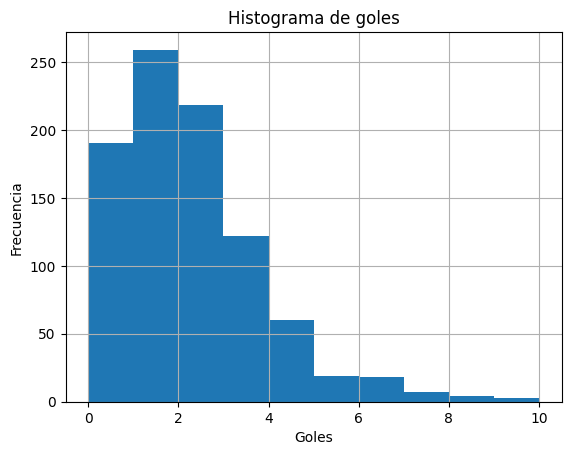

In [190]:
#Histograma de goles de local
df['Home Goals'].hist(bins=10)
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.title('Histograma de goles')
plt.show()



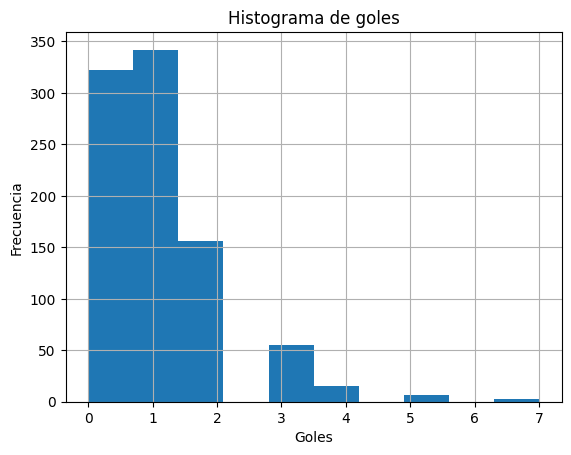

In [191]:
#Histograma de goles de visitante
df['Away Goals'].hist(bins=10)
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.title('Histograma de goles')
plt.show()

<Axes: xlabel='Winning Team'>

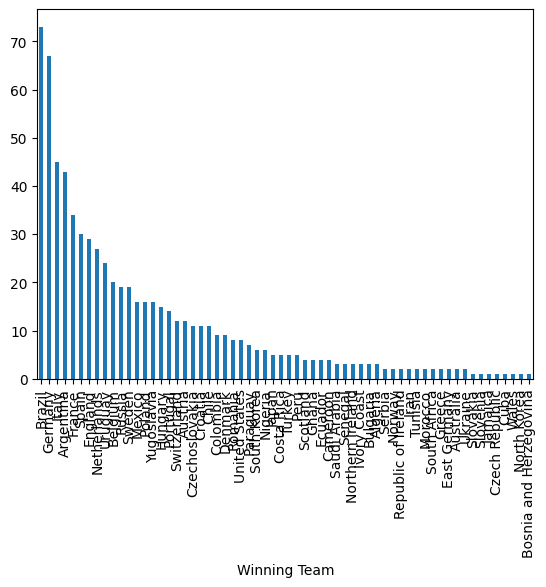

In [192]:
#Diagrama de barras de ganadores en partidos de mundiales
df['Winning Team'].value_counts().plot(kind='bar')

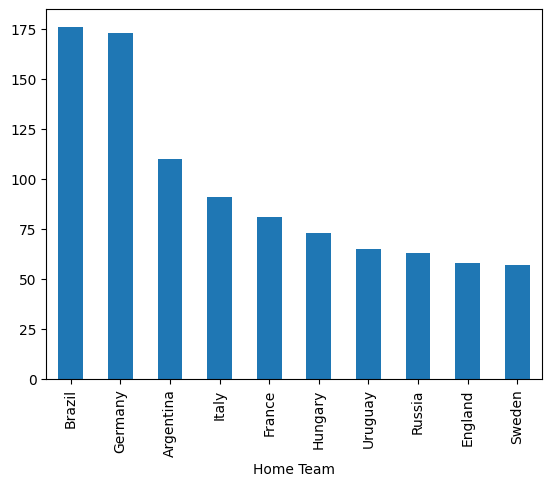

In [193]:
#grafica de los goles por equipo
df.groupby('Home Team')['Home Goals'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.show()

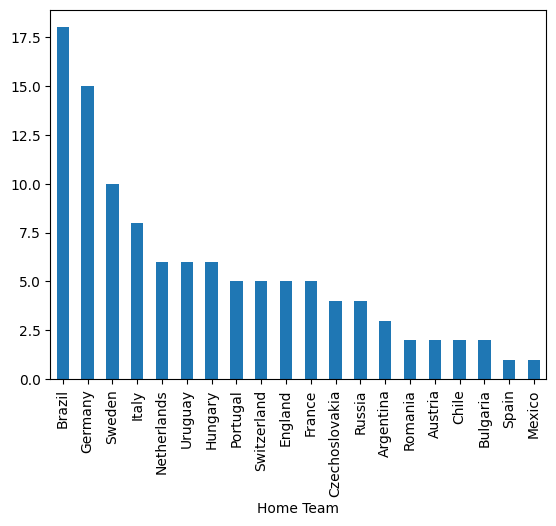

In [194]:
#grafica de los goles en cuartos de final por equipo
df[df['Stage']=='Quarter-finals'].groupby('Home Team')['Home Goals'].sum().sort_values(ascending=False).head(20).plot.bar()
plt.show()

<Axes: xlabel='Winner'>

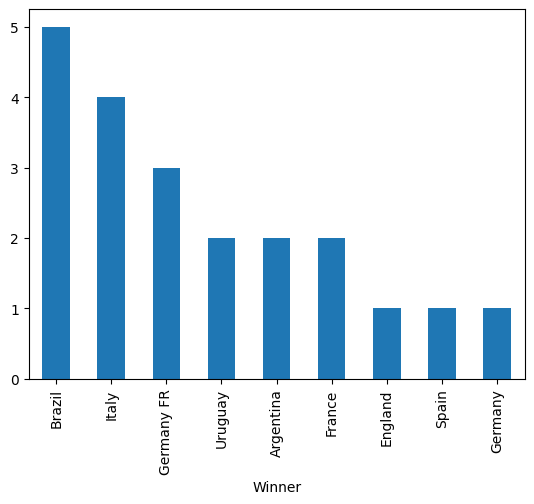

In [195]:
#Diagrama de barras de ganadores de mundiales
df = pd.read_csv('Data/world_cups.csv')
df['Winner'].value_counts().plot(kind='bar')

<Axes: xlabel='Runners-Up'>

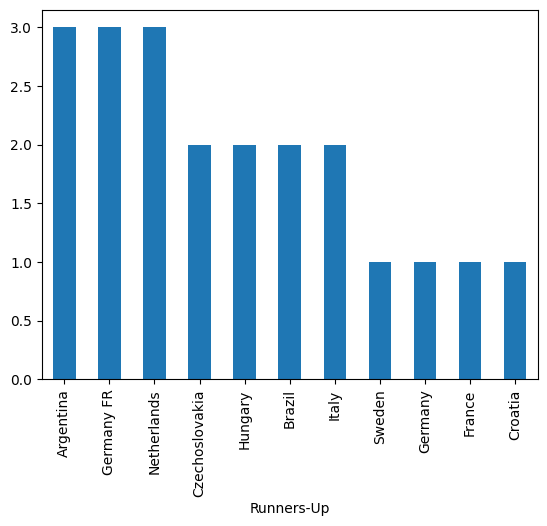

In [196]:
#Diagrama de barras de subcampeones de mundiales
df['Runners-Up'].value_counts().plot(kind='bar')

<Axes: xlabel='Third'>

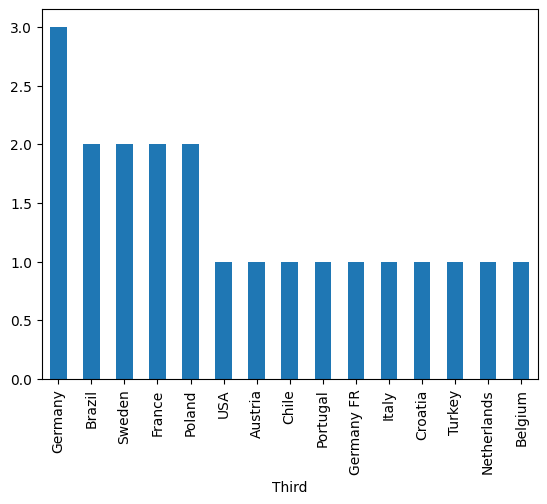

In [197]:
#Diagrama de barras de terceros lugares de mundiales
df['Third'].value_counts().plot(kind='bar')

<Axes: xlabel='Fourth'>

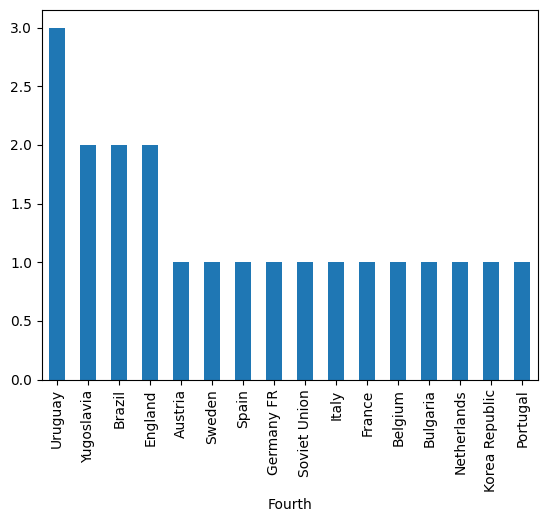

In [198]:
#Diagrama de barras de cuartos lugares de mundiales
df['Fourth'].value_counts().plot(kind='bar')

## Eliminación inicial de variables:
- Se eliminó la columna relacionada con el **cuarto lugar** puesto que esos países no se ven involucrados en su mayoría como campeones o subcampeones.
- Se eliminaron los **países que menos partidos han ganado en mundiales**, puesto que no se ven involucrados en las etapas finales.
- Los **equipos visitantes** suelen estar ahí en vista de la clasificación del futbol de peor contra mejor por lo que se ve que hacen menos goles, no tienen mucha relevancia

In [199]:
df = pd.read_csv('Data/world_cups.csv')
dfm = pd.read_csv('Data/world_cup_matches.csv')
#Cruzar las tablas
df = df.merge(dfm, left_on='Year', right_on='Year', how='left')

In [200]:
del df['Win Conditions']
del df['Host Team']
df.head(100)

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played,ID,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1,1930/7/13,Group stage,France,4,1,Mexico,France,Mexico
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,2,1930/7/13,Group stage,United States,3,0,Belgium,United States,Belgium
2,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,3,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,Yugoslavia,Brazil
3,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,4,1930/7/14,Group stage,Romania,3,1,Peru,Romania,Peru
4,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,5,1930/7/15,Group stage,Argentina,1,0,France,Argentina,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,96,1954/6/27,Quarter-finals,Germany,2,0,Yugoslavia,Germany,Yugoslavia
96,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,97,1954/6/27,Quarter-finals,Hungary,4,2,Brazil,Hungary,Brazil
97,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,98,1954/6/30,Semi-finals,Germany,6,1,Austria,Germany,Austria
98,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,99,1954/6/30,Semi-finals,Hungary,4,2,Uruguay,Hungary,Uruguay


In [201]:
#poner la fecha como el dia de la semana y pasarlo a numero
#quitar el cuarto
#label encoder pa lo de la semana
#label encoder pa la stage
#one hot encoder pa el resto
#cambiar lo de ganar por 1 y perder por 0 y empate por 0.5

In [202]:
def determinar_resultado(row):
    if row['Winning Team'] == row['Away Team']:
        return 0
    elif row['Winning Team'] == row['Home Team']:
        return 1
    else:
        return 0.5

In [203]:
df['Result'] = df.apply(determinar_resultado, axis=1)


In [204]:
del df['Winning Team']


In [205]:
del df['Losing Team']


In [206]:
del df['ID']

In [207]:
df.head(10)

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/13,Group stage,France,4,1,Mexico,1.0
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/13,Group stage,United States,3,0,Belgium,1.0
2,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/14,Group stage,Romania,3,1,Peru,1.0
4,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/15,Group stage,Argentina,1,0,France,1.0
5,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/16,Group stage,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/17,Group stage,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/17,Group stage,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/18,Group stage,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/19,Group stage,Chile,1,0,France,1.0


In [208]:
del df['Host Country']

In [209]:
del df['Fourth']

## Preparación de datos

In [210]:
def sustituirDia(row):
    fecha_obj = datetime.strptime(row['Date'], "%Y/%m/%d")
    return fecha_obj.strftime("%A")

In [211]:
df_understandable = df.copy()

In [212]:
df['Date'] = df.apply(sustituirDia, axis=1)


In [213]:
df.head(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Argentina,USA,70,13,18,Sunday,Group stage,France,4,1,Mexico,1.0
1,1930,Uruguay,Argentina,USA,70,13,18,Sunday,Group stage,United States,3,0,Belgium,1.0
2,1930,Uruguay,Argentina,USA,70,13,18,Monday,Group stage,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Argentina,USA,70,13,18,Monday,Group stage,Romania,3,1,Peru,1.0
4,1930,Uruguay,Argentina,USA,70,13,18,Tuesday,Group stage,Argentina,1,0,France,1.0
5,1930,Uruguay,Argentina,USA,70,13,18,Wednesday,Group stage,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Argentina,USA,70,13,18,Thursday,Group stage,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Argentina,USA,70,13,18,Thursday,Group stage,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Argentina,USA,70,13,18,Friday,Group stage,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Argentina,USA,70,13,18,Saturday,Group stage,Chile,1,0,France,1.0


In [214]:

# Label encoder
week_days = {
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday': 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
}


In [215]:
def sustituirDia(row):
    return week_days[row['Date']]

In [216]:
df['Date'] = df.apply(sustituirDia, axis=1)
df.head(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Argentina,USA,70,13,18,6,Group stage,France,4,1,Mexico,1.0
1,1930,Uruguay,Argentina,USA,70,13,18,6,Group stage,United States,3,0,Belgium,1.0
2,1930,Uruguay,Argentina,USA,70,13,18,0,Group stage,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Argentina,USA,70,13,18,0,Group stage,Romania,3,1,Peru,1.0
4,1930,Uruguay,Argentina,USA,70,13,18,1,Group stage,Argentina,1,0,France,1.0
5,1930,Uruguay,Argentina,USA,70,13,18,2,Group stage,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Argentina,USA,70,13,18,3,Group stage,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Argentina,USA,70,13,18,3,Group stage,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Argentina,USA,70,13,18,4,Group stage,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Argentina,USA,70,13,18,5,Group stage,Chile,1,0,France,1.0


In [217]:
def equivalenciaStage(row):
    if(row['Stage'] == 'First group stage' or row['Stage'] == 'First round'):
        return 'Group stage'
    elif(row['Stage'] == 'Second group stage' or row['Stage'] == 'Final round'):
        return 'Round of 16'
    else:
        return row['Stage']

In [218]:
df['Stage'] = df.apply(equivalenciaStage, axis=1)

In [219]:
stages = {
    'Group stage' : 0,
    'Round of 16' : 1,
    'Quarter-finals' : 2,
    'Semi-finals' : 3,
    'Third place' : 4,
    'Final' : 5
}
def sustituirStage(row):
    return stages[row['Stage']]

In [220]:
df['Stage'] = df.apply(sustituirStage, axis=1)

In [221]:
df.head(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Argentina,USA,70,13,18,6,0,France,4,1,Mexico,1.0
1,1930,Uruguay,Argentina,USA,70,13,18,6,0,United States,3,0,Belgium,1.0
2,1930,Uruguay,Argentina,USA,70,13,18,0,0,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Argentina,USA,70,13,18,0,0,Romania,3,1,Peru,1.0
4,1930,Uruguay,Argentina,USA,70,13,18,1,0,Argentina,1,0,France,1.0
5,1930,Uruguay,Argentina,USA,70,13,18,2,0,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Argentina,USA,70,13,18,3,0,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Argentina,USA,70,13,18,3,0,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Argentina,USA,70,13,18,4,0,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Argentina,USA,70,13,18,5,0,Chile,1,0,France,1.0


In [222]:
df_encoded = pd.get_dummies(df, columns=['Runners-Up', 'Third', 'Home Team', 'Away Team'])

In [223]:
df_encoded.head(10)

,Year,Winner,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Goals,Away Goals,Result,...,Away Team_Togo,Away Team_Trinidad and Tobago,Away Team_Tunisia,Away Team_Turkey,Away Team_Ukraine,Away Team_United Arab Emirates,Away Team_United States,Away Team_Uruguay,Away Team_Wales,Away Team_Yugoslavia
0,1930,Uruguay,70,13,18,6,0,4,1,1.0,...,False,False,False,False,False,False,False,False,False,False
1,1930,Uruguay,70,13,18,6,0,3,0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,1930,Uruguay,70,13,18,0,0,2,1,1.0,...,False,False,False,False,False,False,False,False,False,False
3,1930,Uruguay,70,13,18,0,0,3,1,1.0,...,False,False,False,False,False,False,False,False,False,False
4,1930,Uruguay,70,13,18,1,0,1,0,1.0,...,False,False,False,False,False,False,False,False,False,False
5,1930,Uruguay,70,13,18,2,0,3,0,1.0,...,False,False,False,False,False,False,False,False,False,False
6,1930,Uruguay,70,13,18,3,0,4,0,1.0,...,False,False,False,False,False,False,False,False,False,False
7,1930,Uruguay,70,13,18,3,0,3,0,1.0,...,False,False,False,False,False,False,False,False,False,False
8,1930,Uruguay,70,13,18,4,0,1,0,1.0,...,False,False,False,False,False,False,False,False,False,False
9,1930,Uruguay,70,13,18,5,0,1,0,1.0,...,False,False,False,False,False,False,False,False,False,False


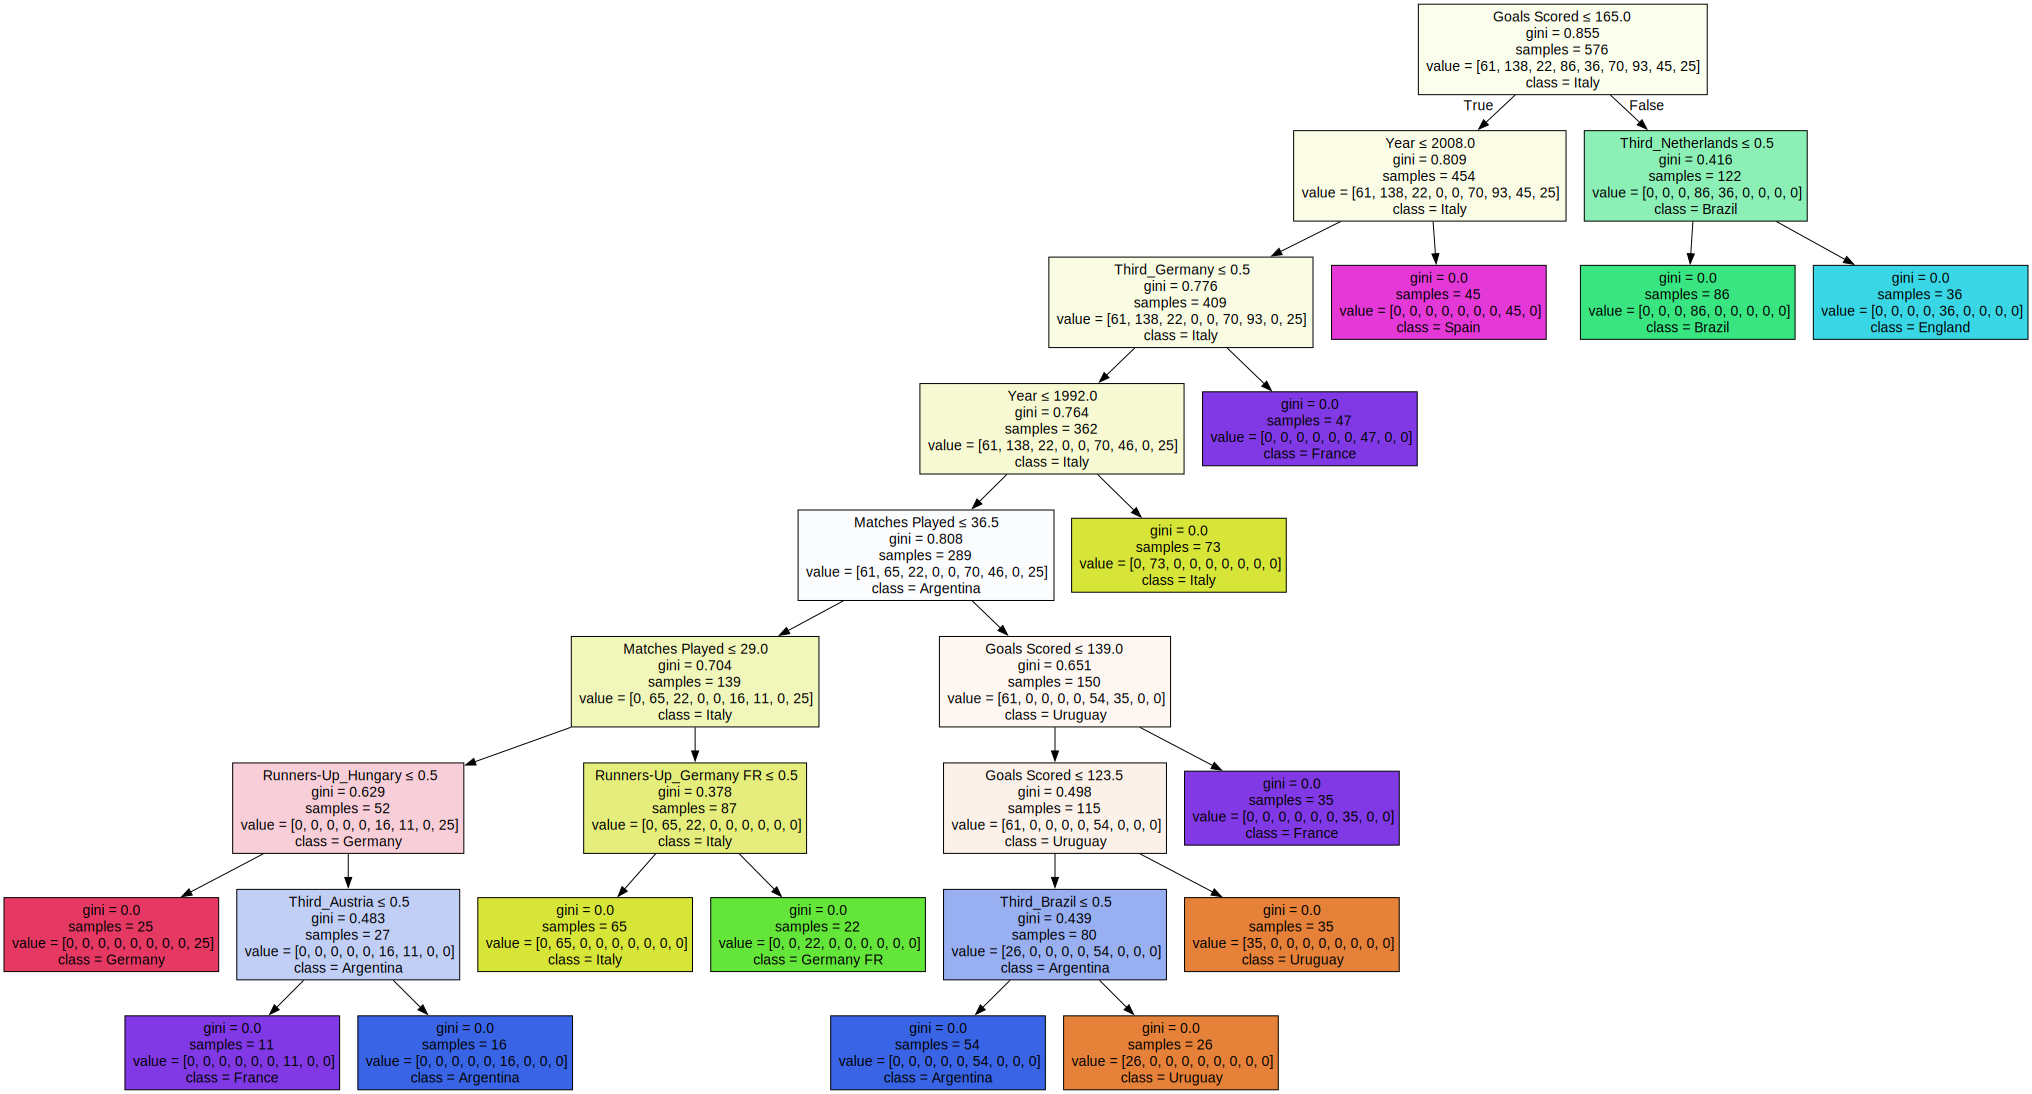

In [224]:
clf = DecisionTreeClassifier(max_depth=8)
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(['Winner'], axis=1), df_encoded['Winner'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
clf = clf.fit(X_train, y_train)

dot_data = export_graphviz(
    clf, out_file=None,
    feature_names=df_encoded.drop(['Winner'],
    axis=1).columns, 
    filled=True, 
    special_characters=True,
    class_names=df_encoded['Winner'].unique().astype(str)
)
graph = graphviz.Source(dot_data)
graph.render(filename = "world_cup.dot")
graph


    Se usó arboles de clasificación para identificar variables más o menos relevantes que pudimos haber omitido con la eliminación inicial, sin embargo, sus resultados no fueron concluyentes.
    Se empiezan a dar indicios de que los datos no funcionan para el objetivo.

In [225]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(['Winner'], axis=1), df_encoded['Winner'], test_size=0.2, random_state=42)

# Definir los hiperparámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 8, 12]
}

# Realizar una búsqueda de hiperparámetros con validación cruzada
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_clf = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred = best_clf.predict(X_test)
print("Mejor modelo - Precisión: ", accuracy_score(y_test, y_pred))

Mejor modelo - Precisión:  1.0


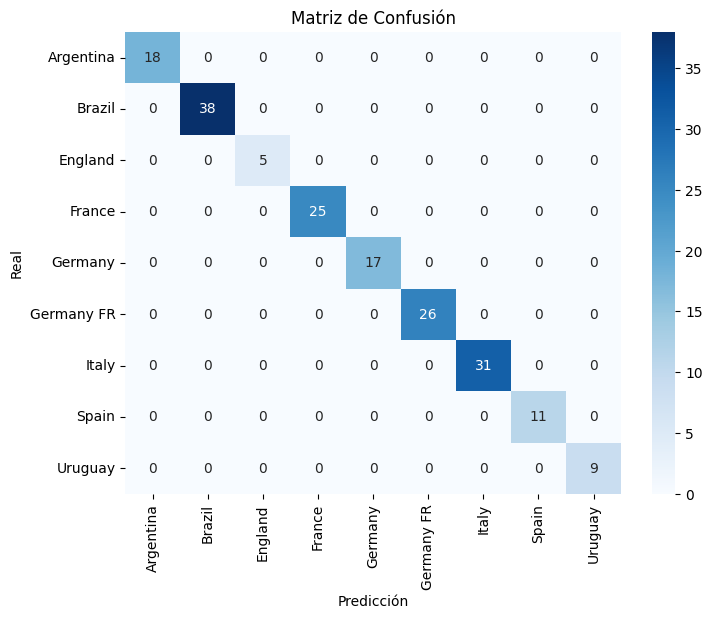

In [226]:
# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor (heatmap) de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [227]:
df_encoded = df_encoded.drop(['Winner'], axis=1)
df_encoded.head(10)

,Year,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Goals,Away Goals,Result,Runners-Up_Argentina,...,Away Team_Togo,Away Team_Trinidad and Tobago,Away Team_Tunisia,Away Team_Turkey,Away Team_Ukraine,Away Team_United Arab Emirates,Away Team_United States,Away Team_Uruguay,Away Team_Wales,Away Team_Yugoslavia
0,1930,70,13,18,6,0,4,1,1.0,True,...,False,False,False,False,False,False,False,False,False,False
1,1930,70,13,18,6,0,3,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
2,1930,70,13,18,0,0,2,1,1.0,True,...,False,False,False,False,False,False,False,False,False,False
3,1930,70,13,18,0,0,3,1,1.0,True,...,False,False,False,False,False,False,False,False,False,False
4,1930,70,13,18,1,0,1,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
5,1930,70,13,18,2,0,3,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
6,1930,70,13,18,3,0,4,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
7,1930,70,13,18,3,0,3,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
8,1930,70,13,18,4,0,1,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
9,1930,70,13,18,5,0,1,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False


## Uso de algoritmos de Machine Learning

C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change

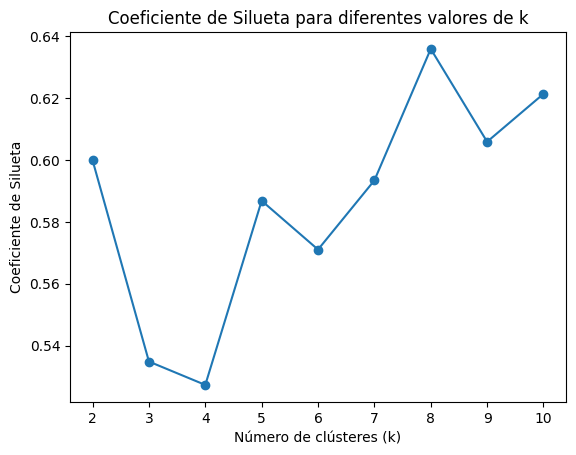

In [228]:
# X es tu matriz de datos
X = df_encoded.values

# Rango de valores de k a probar
k_values = range(2, 11)  # Puedes ajustar el rango según tus necesidades

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes valores de k')
plt.show()

In [229]:
n_clusters = 8  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)

     Year      Winner   Runners-Up        Third  Goals Scored  \
819  2014     Germany    Argentina  Netherlands           171   
481  1994      Brazil        Italy       Sweden           141   
379  1986   Argentina   Germany FR       France           132   
367  1986   Argentina   Germany FR       France           132   
446  1990  Germany FR    Argentina        Italy           115   
176  1966     England   Germany FR     Portugal            89   
339  1982       Italy   Germany FR       Poland           146   
708  2010       Spain  Netherlands      Germany           145   

     Qualified Teams  Matches Played  Date  Stage            Home Team  \
819               32              64     3      0              Algeria   
481               24              52     4      0               Mexico   
379               24              52     5      0               Mexico   
367               24              52     1      0               Mexico   
446               24              52     3  

In [230]:
df_encoded.head(10)

,Year,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Goals,Away Goals,Result,Runners-Up_Argentina,...,Away Team_Togo,Away Team_Trinidad and Tobago,Away Team_Tunisia,Away Team_Turkey,Away Team_Ukraine,Away Team_United Arab Emirates,Away Team_United States,Away Team_Uruguay,Away Team_Wales,Away Team_Yugoslavia
0,1930,70,13,18,6,0,4,1,1.0,True,...,False,False,False,False,False,False,False,False,False,False
1,1930,70,13,18,6,0,3,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
2,1930,70,13,18,0,0,2,1,1.0,True,...,False,False,False,False,False,False,False,False,False,False
3,1930,70,13,18,0,0,3,1,1.0,True,...,False,False,False,False,False,False,False,False,False,False
4,1930,70,13,18,1,0,1,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
5,1930,70,13,18,2,0,3,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
6,1930,70,13,18,3,0,4,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
7,1930,70,13,18,3,0,3,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
8,1930,70,13,18,4,0,1,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
9,1930,70,13,18,5,0,1,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False


## Metricas seleccionadas y valores obtenidos

C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


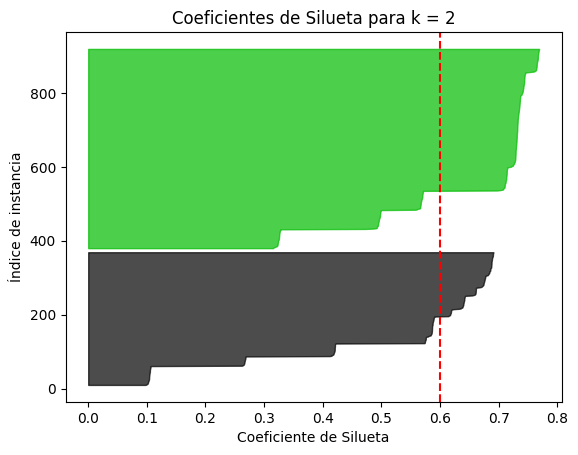

C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


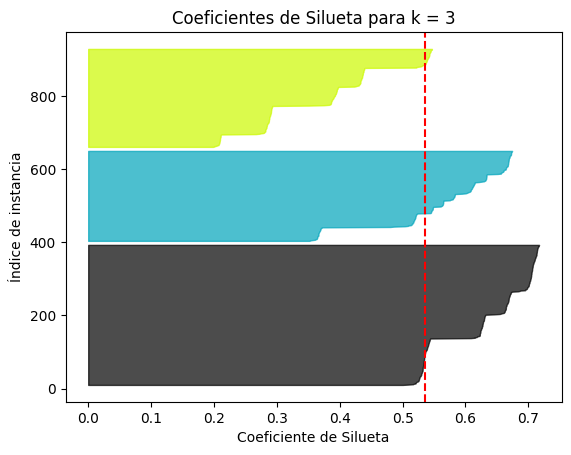

C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


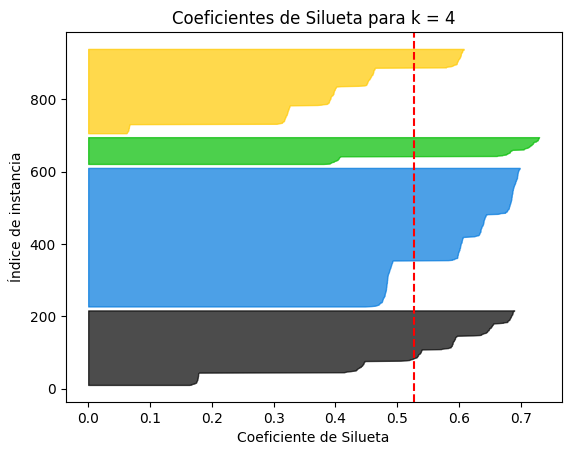

C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


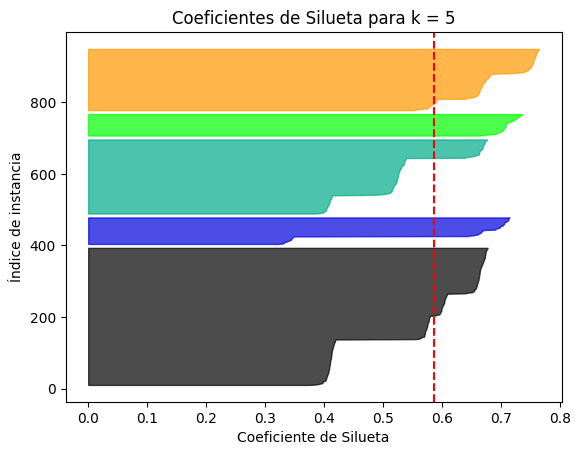

C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


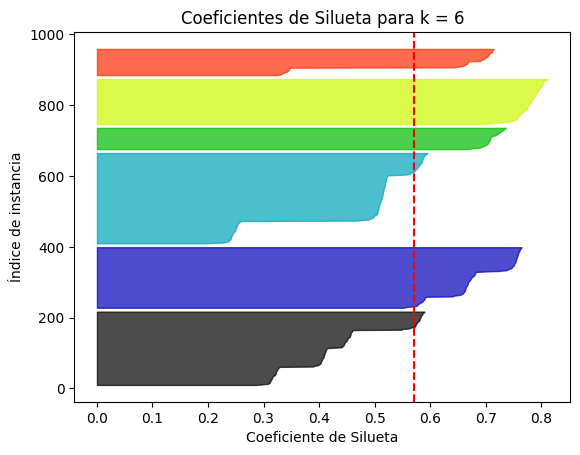

C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


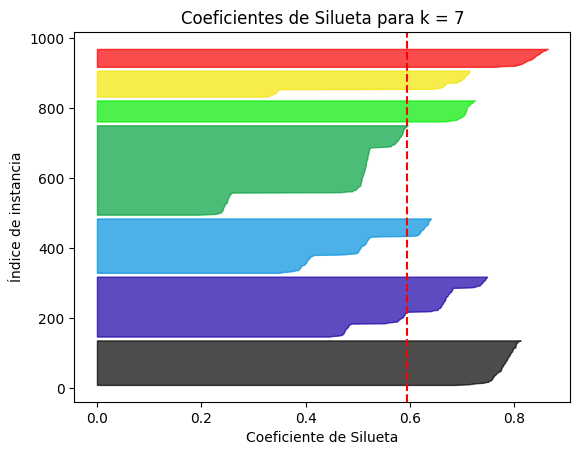

C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


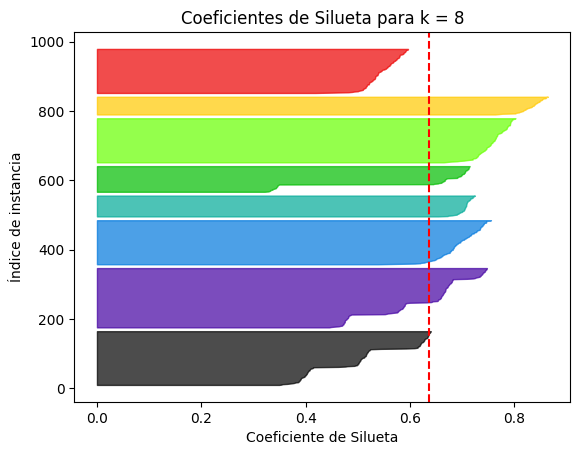

C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


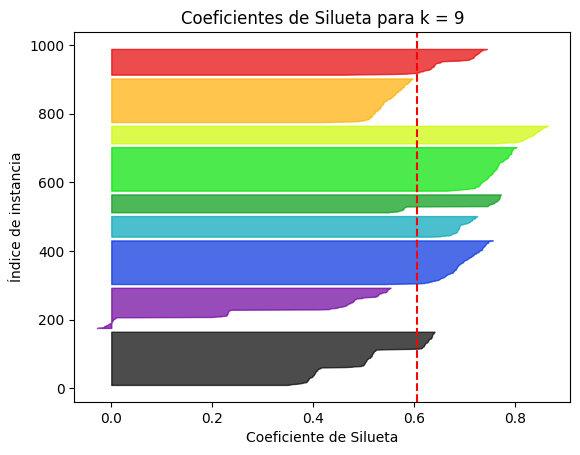

C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


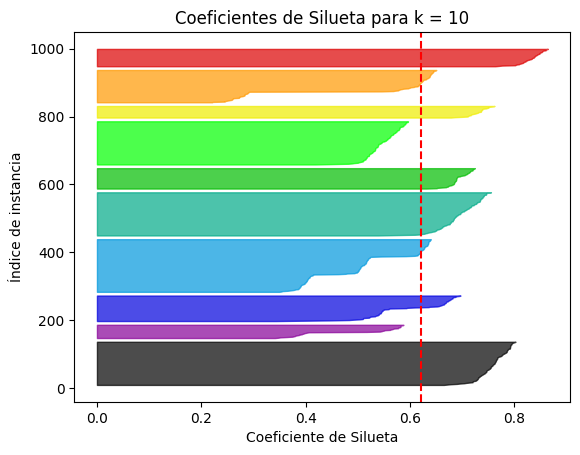

In [231]:

# X es tu matriz de datos
X = df_encoded

# Rango de valores de k a probar
k_values = range(2, 11)  # Puedes ajustar el rango según tus necesidades

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette_values = silhouette_samples(X, cluster_labels)
    
    # Crear una figura para mostrar los coeficientes de silueta
    plt.figure()
    plt.title(f"Coeficientes de Silueta para k = {k}")
    plt.xlabel("Coeficiente de Silueta")
    plt.ylabel("Índice de instancia")
    
    y_lower = 10
    for i in range(k):
        cluster_silhouette_values = silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        y_lower = y_upper + 10

    plt.axvline(x=np.mean(silhouette_values), color="red", linestyle="--")
    plt.show()


C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolas Padilla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change

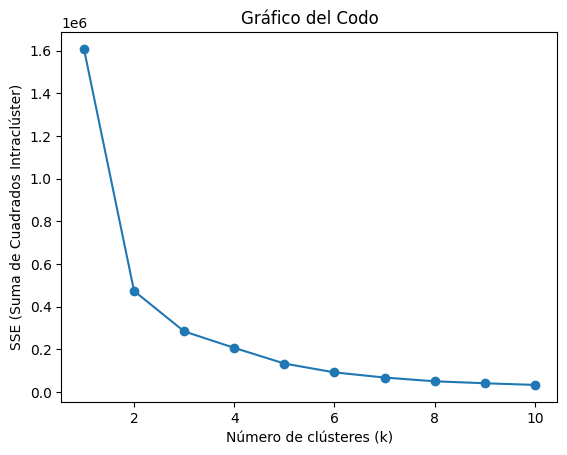

In [232]:


# X es tu matriz de datos
X = df_encoded

# Rango de valores de k a probar
k_values = range(1, 11)  # Puedes ajustar el rango según tus necesidades

sse_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse = kmeans.inertia_  # Obtener el valor de SSE
    sse_values.append(sse)

# Trama el gráfico del codo
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('SSE (Suma de Cuadrados Intraclúster)')
plt.title('Gráfico del Codo')
plt.show()


In [233]:
num_features = df_encoded.shape[1]  
print("Número de características:", num_features)
df_encoded.head(10)

Número de características: 193


,Year,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Goals,Away Goals,Result,Runners-Up_Argentina,...,Away Team_Togo,Away Team_Trinidad and Tobago,Away Team_Tunisia,Away Team_Turkey,Away Team_Ukraine,Away Team_United Arab Emirates,Away Team_United States,Away Team_Uruguay,Away Team_Wales,Away Team_Yugoslavia
0,1930,70,13,18,6,0,4,1,1.0,True,...,False,False,False,False,False,False,False,False,False,False
1,1930,70,13,18,6,0,3,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
2,1930,70,13,18,0,0,2,1,1.0,True,...,False,False,False,False,False,False,False,False,False,False
3,1930,70,13,18,0,0,3,1,1.0,True,...,False,False,False,False,False,False,False,False,False,False
4,1930,70,13,18,1,0,1,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
5,1930,70,13,18,2,0,3,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
6,1930,70,13,18,3,0,4,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
7,1930,70,13,18,3,0,3,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
8,1930,70,13,18,4,0,1,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
9,1930,70,13,18,5,0,1,0,1.0,True,...,False,False,False,False,False,False,False,False,False,False


In [234]:
df_encoded_numeric = df_encoded.applymap(lambda x: 1 if x == True else (0 if x == False else x))

C:\Users\Nicolas Padilla\AppData\Local\Temp\ipykernel_7208\1838974317.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded_numeric = df_encoded.applymap(lambda x: 1 if x == True else (0 if x == False else x))


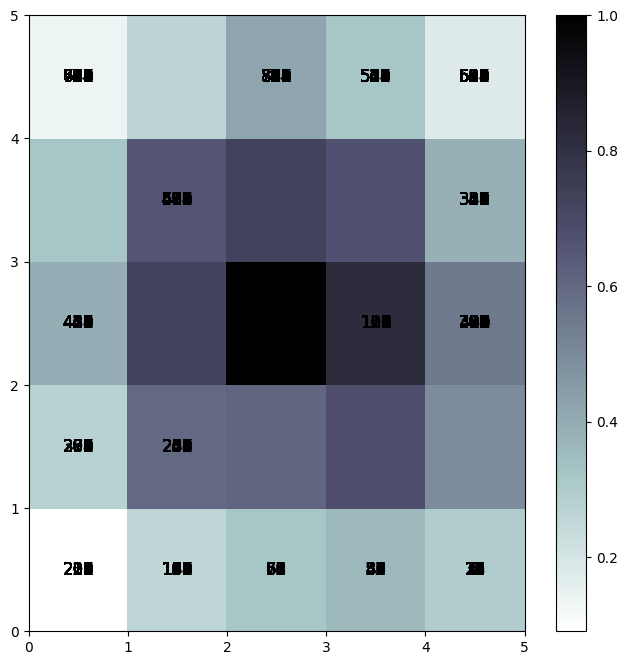

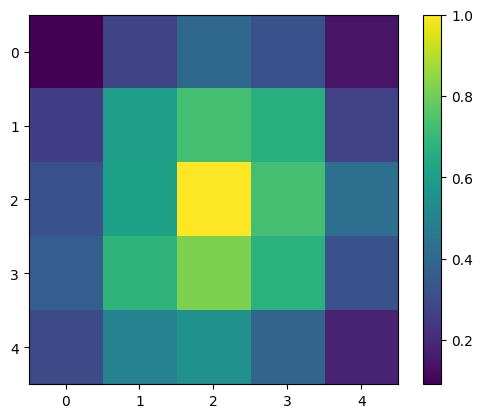

In [235]:

np.random.seed(42)  # Fijar la semilla para reproducibilidad

# Crear un conjunto de datos de ejemplo
data = df_encoded_numeric.values  # Reemplaza esto con tus propios datos

# Definir la configuración del SOM
som_grid_size = (5, 5)  # Tamaño del mapa SOM
input_dim = 193  # Dimensión de las entradas

# Crear el SOM
som = MiniSom(som_grid_size[0], som_grid_size[1], input_dim, sigma=1.0, learning_rate=0.5)

# Inicializar los pesos del SOM de manera fija
som.random_weights_init(data)

# Entrenar el SOM
num_iterations = 1000  # Número de iteraciones de entrenamiento
som.train_random(data, num_iterations)

# Mapear los datos a las neuronas ganadoras
winners = np.array([som.winner(x) for x in data]) #lo de data

# Crear un gráfico de dispersión para visualizar las neuronas ganadoras
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

# Marcar las neuronas ganadoras en el mapa
for i, (x, y) in enumerate(winners):
    plt.text(x + 0.5, y + 0.5, str(i), fontsize=12, ha='center', va='center')

plt.show()

#Regiones de alta y baja densidad del SOM
umatrix = som.distance_map()
plt.imshow(umatrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()


In [236]:
SOM_clusters = []
for coordinate in winners:
    if(coordinate[0]==0):
        SOM_clusters.append(0)
    elif(coordinate[0]==1):
        SOM_clusters.append(1)
    elif((coordinate[0]==2 or coordinate[0]==3) and coordinate[1]==0):
        SOM_clusters.append(2)
    elif((coordinate[0]==2 or coordinate[0]==3) and (coordinate[1]==1 or coordinate[1]==2 or coordinate[1]==3)):
        SOM_clusters.append(3)    
    elif((coordinate[0]==2 or coordinate[0]==3) and coordinate[1]==4):
        SOM_clusters.append(4)
    else:
        SOM_clusters.append(5)    

cluster_labels = pd.Series(SOM_clusters, name = 'Cluster')

df_understandable['Cluster'] = cluster_labels

df_understandable.head(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result,Cluster
0,1930,Uruguay,Argentina,USA,70,13,18,1930/7/13,Group stage,France,4,1,Mexico,1.0,5
1,1930,Uruguay,Argentina,USA,70,13,18,1930/7/13,Group stage,United States,3,0,Belgium,1.0,5
2,1930,Uruguay,Argentina,USA,70,13,18,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,1.0,5
3,1930,Uruguay,Argentina,USA,70,13,18,1930/7/14,Group stage,Romania,3,1,Peru,1.0,5
4,1930,Uruguay,Argentina,USA,70,13,18,1930/7/15,Group stage,Argentina,1,0,France,1.0,5
5,1930,Uruguay,Argentina,USA,70,13,18,1930/7/16,Group stage,Chile,3,0,Mexico,1.0,5
6,1930,Uruguay,Argentina,USA,70,13,18,1930/7/17,Group stage,Yugoslavia,4,0,Bolivia,1.0,5
7,1930,Uruguay,Argentina,USA,70,13,18,1930/7/17,Group stage,United States,3,0,Paraguay,1.0,5
8,1930,Uruguay,Argentina,USA,70,13,18,1930/7/18,Group stage,Uruguay,1,0,Peru,1.0,5
9,1930,Uruguay,Argentina,USA,70,13,18,1930/7/19,Group stage,Chile,1,0,France,1.0,5


In [237]:
cluster_kmedoids = pd.Series(labels, name = 'ClusterKM')
df_understandable['ClusterKM'] = cluster_kmedoids
df_understandable.head(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result,Cluster,ClusterKM
0,1930,Uruguay,Argentina,USA,70,13,18,1930/7/13,Group stage,France,4,1,Mexico,1.0,5,5
1,1930,Uruguay,Argentina,USA,70,13,18,1930/7/13,Group stage,United States,3,0,Belgium,1.0,5,5
2,1930,Uruguay,Argentina,USA,70,13,18,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,1.0,5,5
3,1930,Uruguay,Argentina,USA,70,13,18,1930/7/14,Group stage,Romania,3,1,Peru,1.0,5,5
4,1930,Uruguay,Argentina,USA,70,13,18,1930/7/15,Group stage,Argentina,1,0,France,1.0,5,5
5,1930,Uruguay,Argentina,USA,70,13,18,1930/7/16,Group stage,Chile,3,0,Mexico,1.0,5,5
6,1930,Uruguay,Argentina,USA,70,13,18,1930/7/17,Group stage,Yugoslavia,4,0,Bolivia,1.0,5,5
7,1930,Uruguay,Argentina,USA,70,13,18,1930/7/17,Group stage,United States,3,0,Paraguay,1.0,5,5
8,1930,Uruguay,Argentina,USA,70,13,18,1930/7/18,Group stage,Uruguay,1,0,Peru,1.0,5,5
9,1930,Uruguay,Argentina,USA,70,13,18,1930/7/19,Group stage,Chile,1,0,France,1.0,5,5


In [238]:

df_clustersKM = []
for i in range(8):
    df_clustersKM.append(df_understandable[df_understandable['ClusterKM']==i])

df_clustersSOM = []
for i in range(6):
    df_clustersSOM.append(df_understandable[df_understandable['Cluster']==i])    


## Resultados

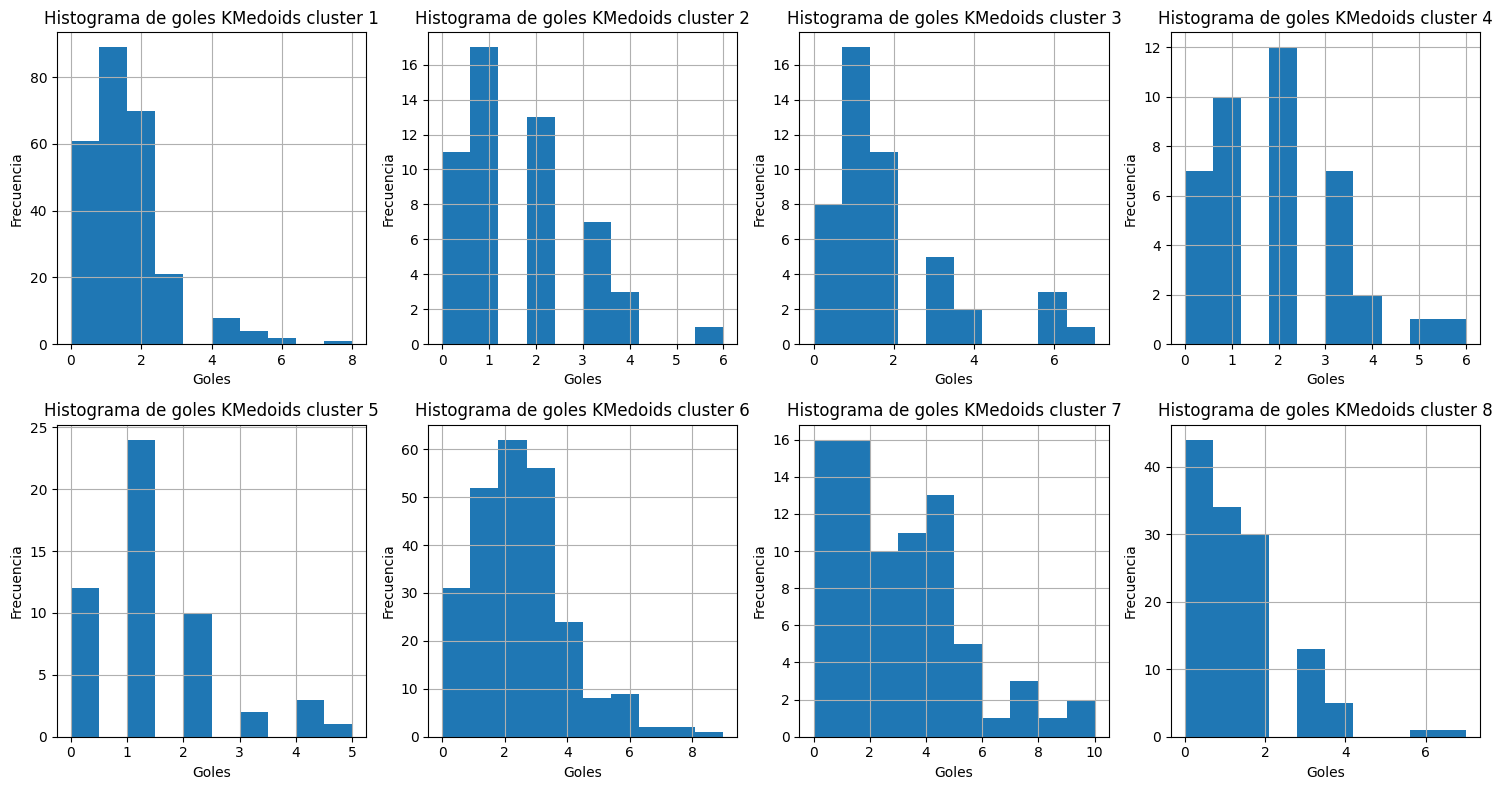

In [239]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))  # 2 filas, 4 columnas
axs = axs.flatten()
for i in range(8):
    df_clustersKM[i]['Home Goals'].hist(bins=10, ax=axs[i])
    axs[i].set_xlabel('Goles')
    axs[i].set_ylabel('Frecuencia')
    axs[i].set_title('Histograma de goles KMedoids cluster '+str(i+1))
plt.tight_layout()
plt.show()

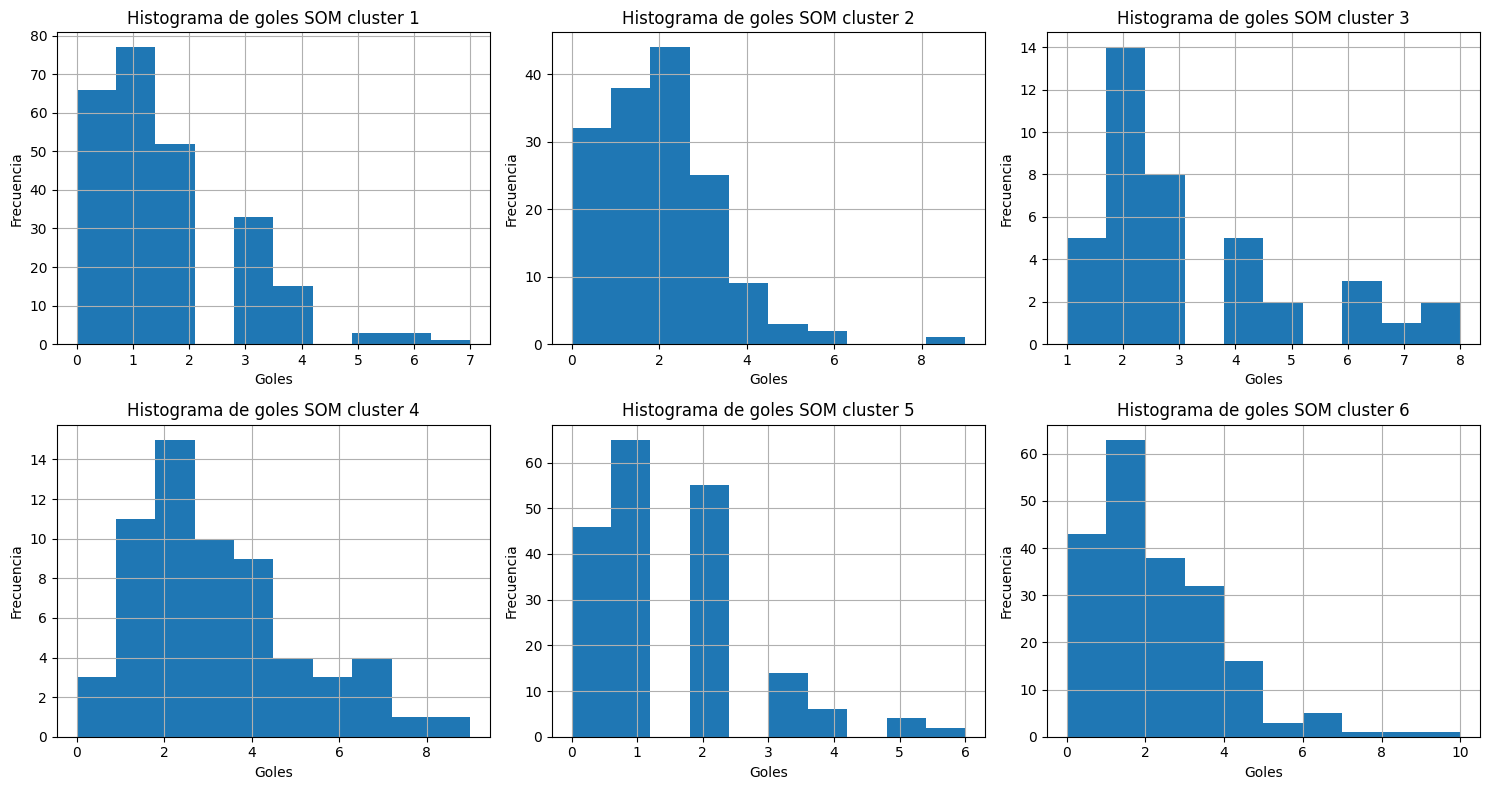

In [240]:

fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # 2 filas, 4 columnas
axs = axs.flatten()
for i in range(6):
    df_clustersSOM[i]['Home Goals'].hist(bins=10, ax=axs[i])
    axs[i].set_xlabel('Goles')
    axs[i].set_ylabel('Frecuencia')
    axs[i].set_title('Histograma de goles SOM cluster '+str(i+1))
plt.tight_layout()
plt.show()


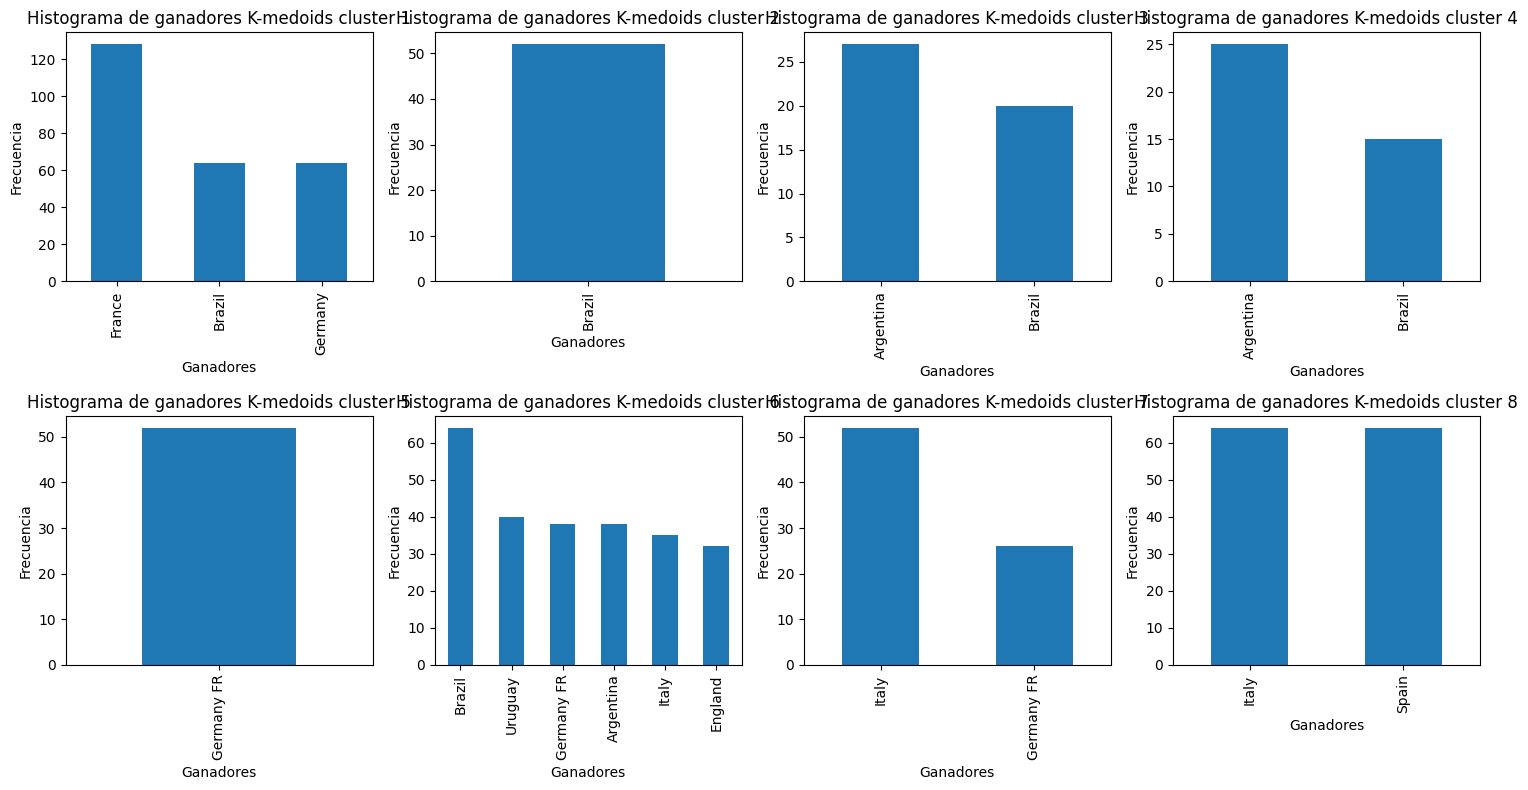

In [241]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))  # 2 filas, 4 columnas
axs = axs.flatten()
for i in range(8):
    df_clustersKM[i]['Winner'].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_xlabel('Ganadores')
    axs[i].set_ylabel('Frecuencia')
    axs[i].set_title('Histograma de ganadores K-medoids cluster '+str(i+1))
plt.tight_layout()
plt.show()


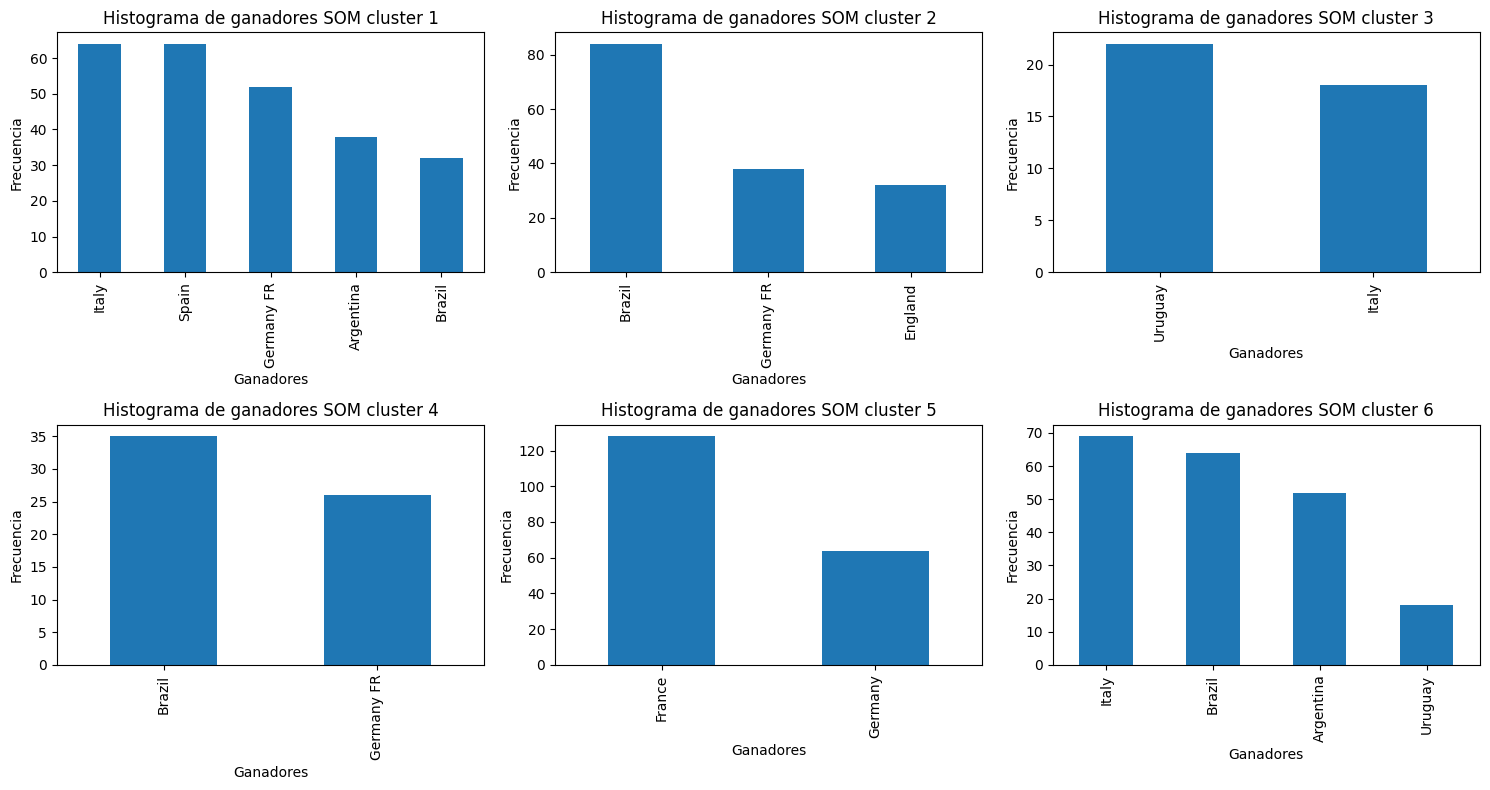

In [242]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()
for i in range(6):
    df_clustersSOM[i]['Winner'].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_xlabel('Ganadores')
    axs[i].set_ylabel('Frecuencia')
    axs[i].set_title('Histograma de ganadores SOM cluster '+str(i+1))
plt.tight_layout()
plt.show()

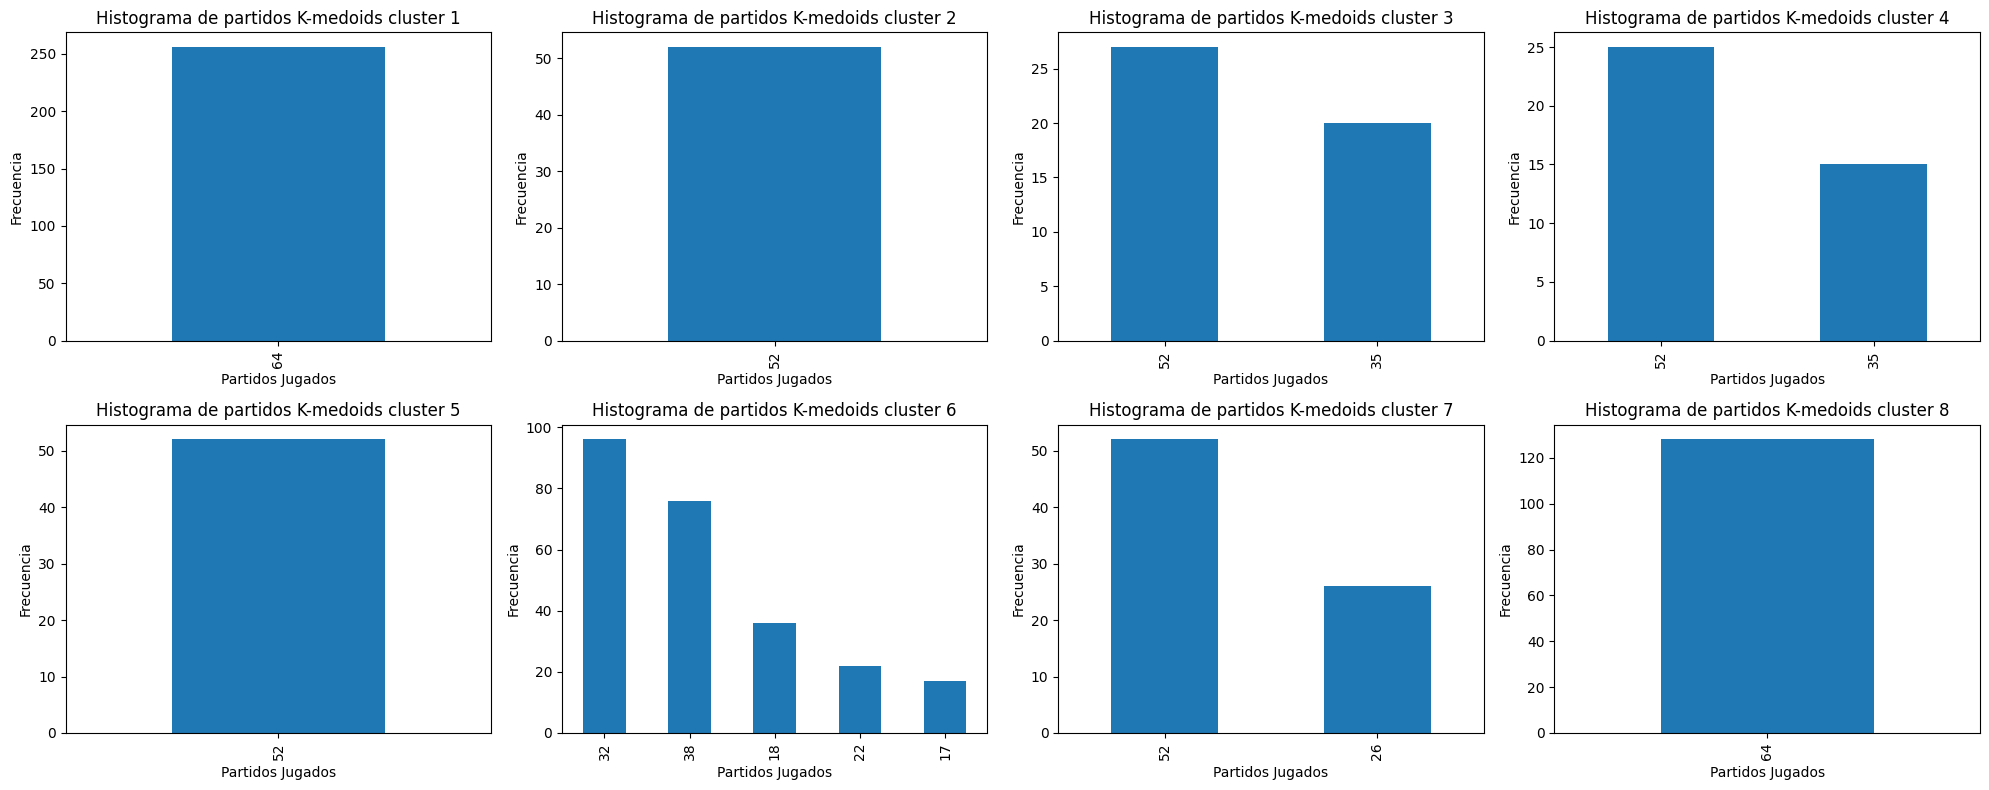

In [243]:
fig, axs = plt.subplots(2, 4, figsize=(20, 8))  # 2 filas, 4 columnas
axs = axs.flatten()
for i in range(8):
    df_clustersKM[i]['Matches Played'].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_xlabel('Partidos Jugados')
    axs[i].set_ylabel('Frecuencia')
    axs[i].set_title('Histograma de partidos K-medoids cluster '+str(i+1))
plt.tight_layout()
plt.show()

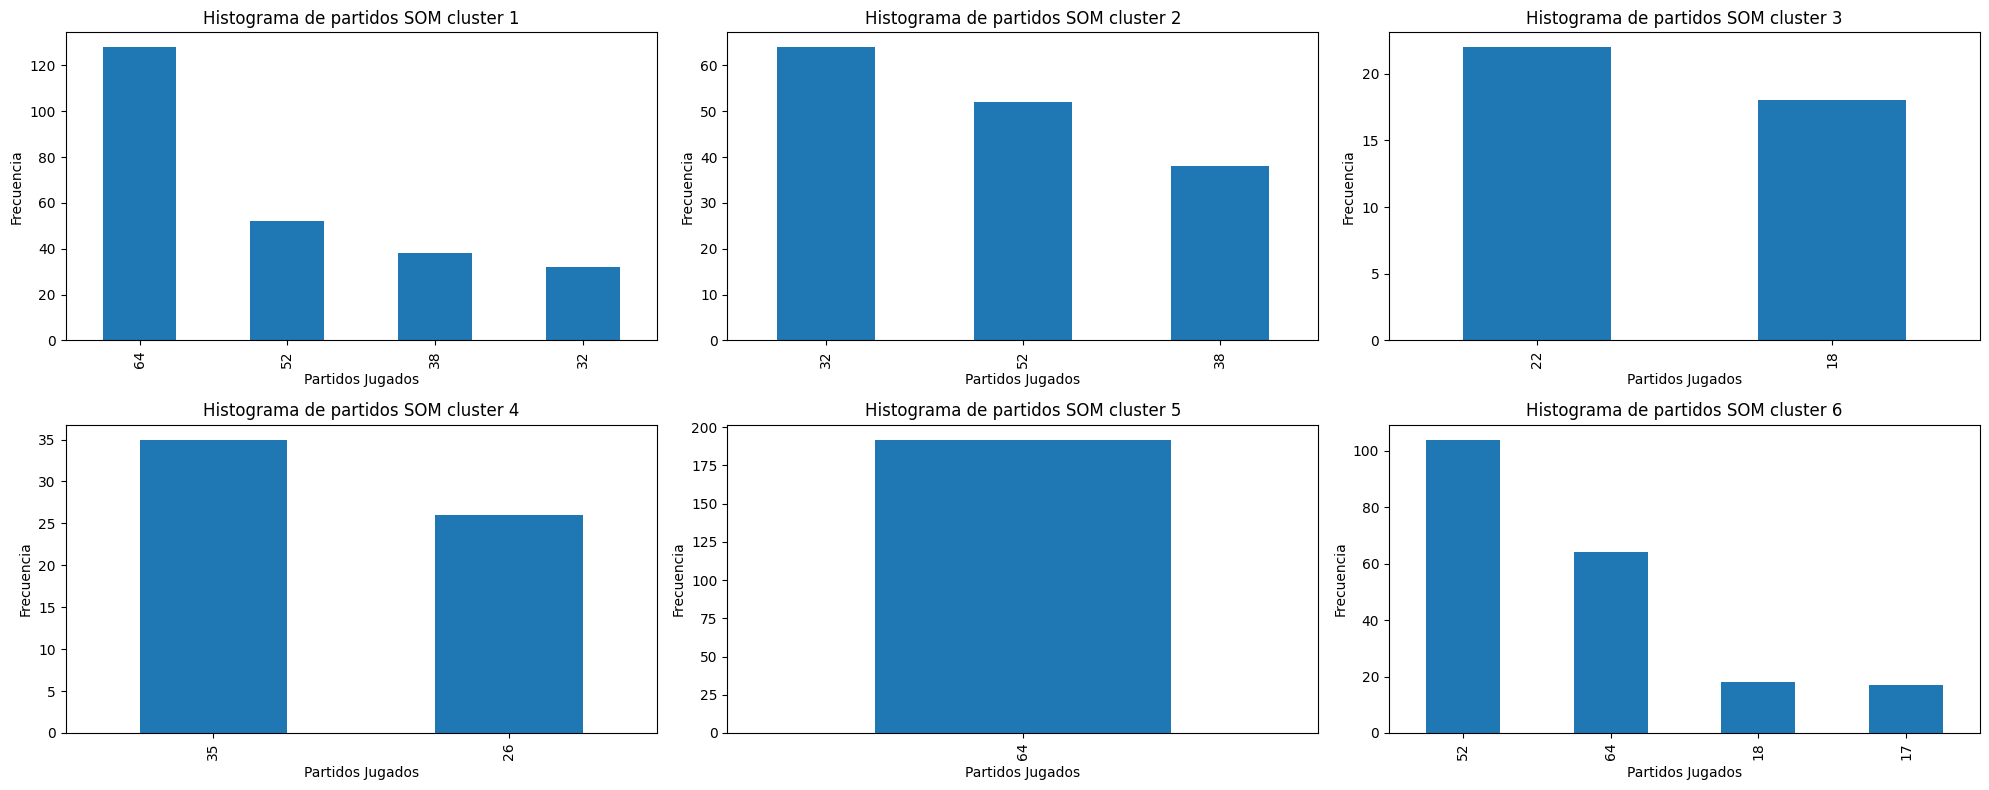

In [244]:
fig, axs = plt.subplots(2, 3, figsize=(20, 8))  
axs = axs.flatten()
for i in range(6):
    df_clustersSOM[i]['Matches Played'].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_xlabel('Partidos Jugados')
    axs[i].set_ylabel('Frecuencia')
    axs[i].set_title('Histograma de partidos SOM cluster '+str(i+1))
plt.tight_layout()
plt.show()

In [245]:
df_understandable.head(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result,Cluster,ClusterKM
0,1930,Uruguay,Argentina,USA,70,13,18,1930/7/13,Group stage,France,4,1,Mexico,1.0,5,5
1,1930,Uruguay,Argentina,USA,70,13,18,1930/7/13,Group stage,United States,3,0,Belgium,1.0,5,5
2,1930,Uruguay,Argentina,USA,70,13,18,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,1.0,5,5
3,1930,Uruguay,Argentina,USA,70,13,18,1930/7/14,Group stage,Romania,3,1,Peru,1.0,5,5
4,1930,Uruguay,Argentina,USA,70,13,18,1930/7/15,Group stage,Argentina,1,0,France,1.0,5,5
5,1930,Uruguay,Argentina,USA,70,13,18,1930/7/16,Group stage,Chile,3,0,Mexico,1.0,5,5
6,1930,Uruguay,Argentina,USA,70,13,18,1930/7/17,Group stage,Yugoslavia,4,0,Bolivia,1.0,5,5
7,1930,Uruguay,Argentina,USA,70,13,18,1930/7/17,Group stage,United States,3,0,Paraguay,1.0,5,5
8,1930,Uruguay,Argentina,USA,70,13,18,1930/7/18,Group stage,Uruguay,1,0,Peru,1.0,5,5
9,1930,Uruguay,Argentina,USA,70,13,18,1930/7/19,Group stage,Chile,1,0,France,1.0,5,5


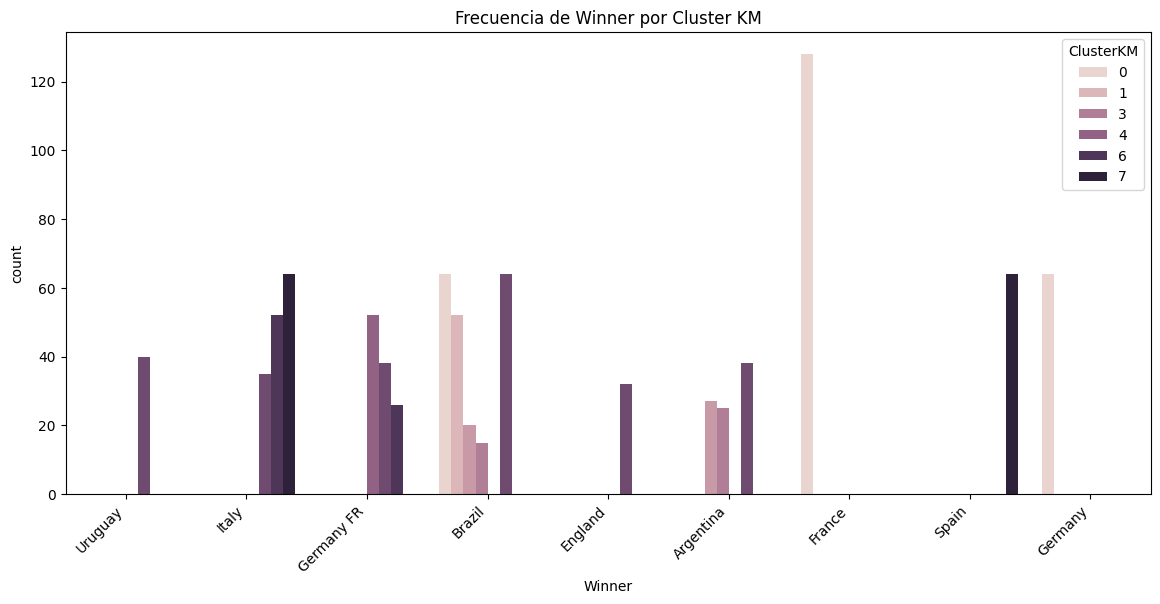

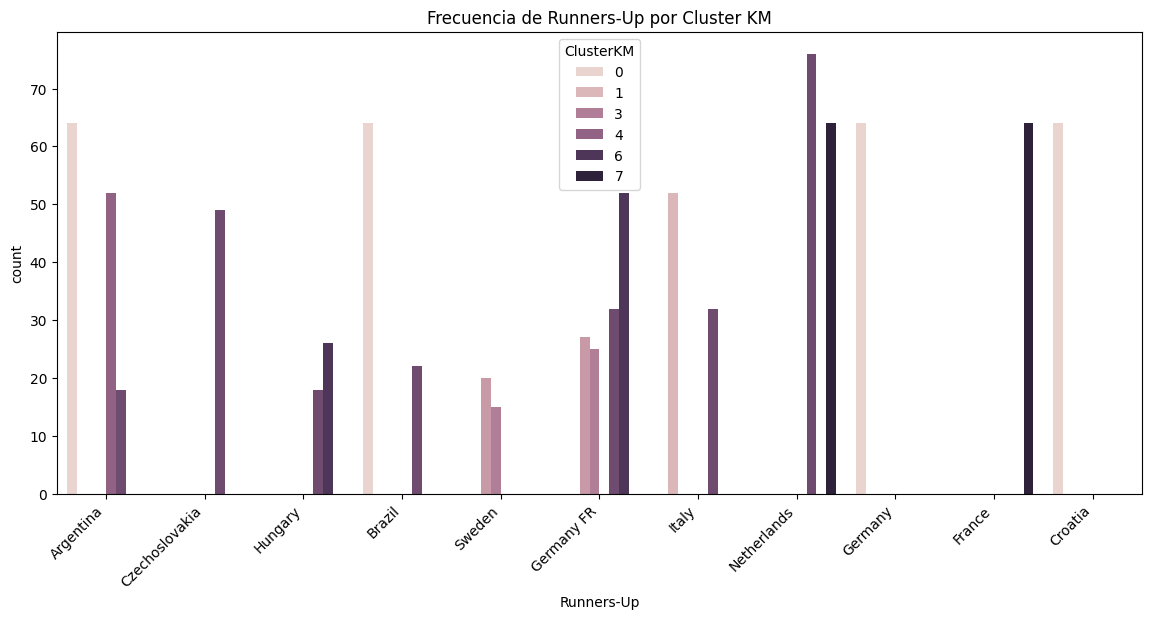

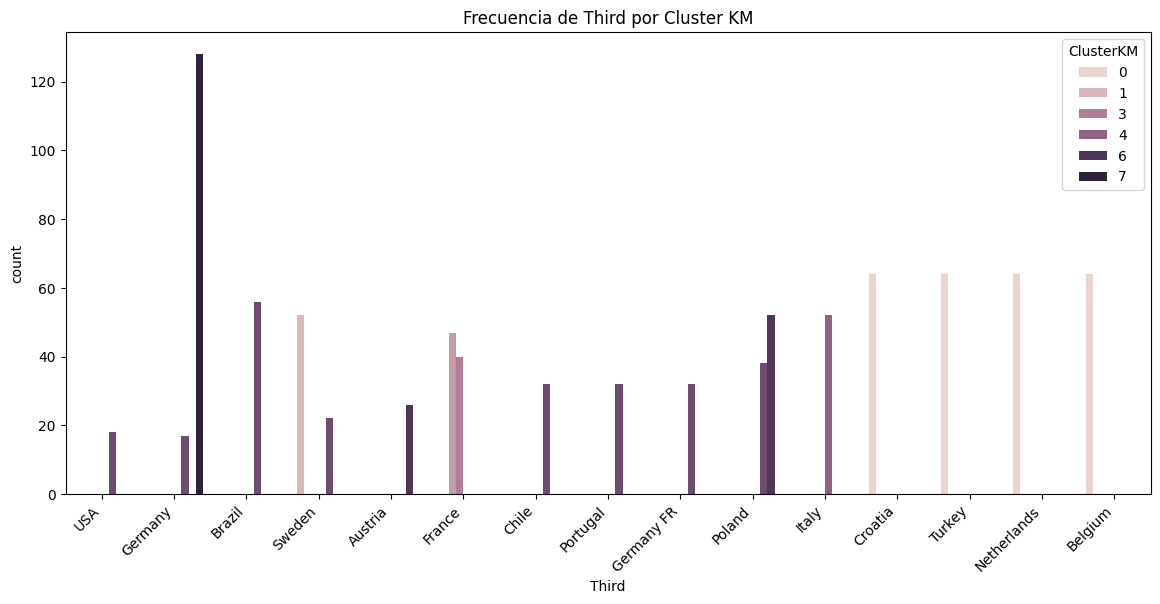

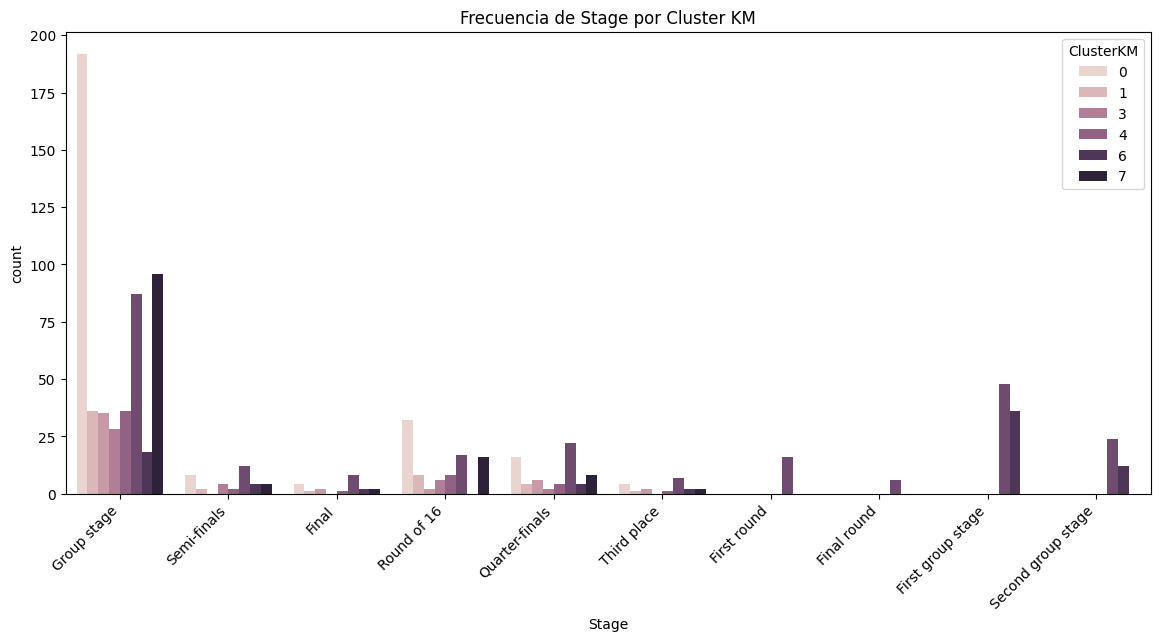

In [246]:
# Lista de columnas categóricas
categorical_columns = ['Winner', 'Runners-Up', 'Third', 'Stage']

# Gráfico de barras para Categorías por Cluster
for col in categorical_columns:
    plt.figure(figsize=(14, 6))
    sns.countplot(x=col, hue='ClusterKM', data=df_understandable)
    plt.title(f'Frecuencia de {col} por Cluster KM')
    plt.xticks(rotation=45, ha='right')
    plt.show()



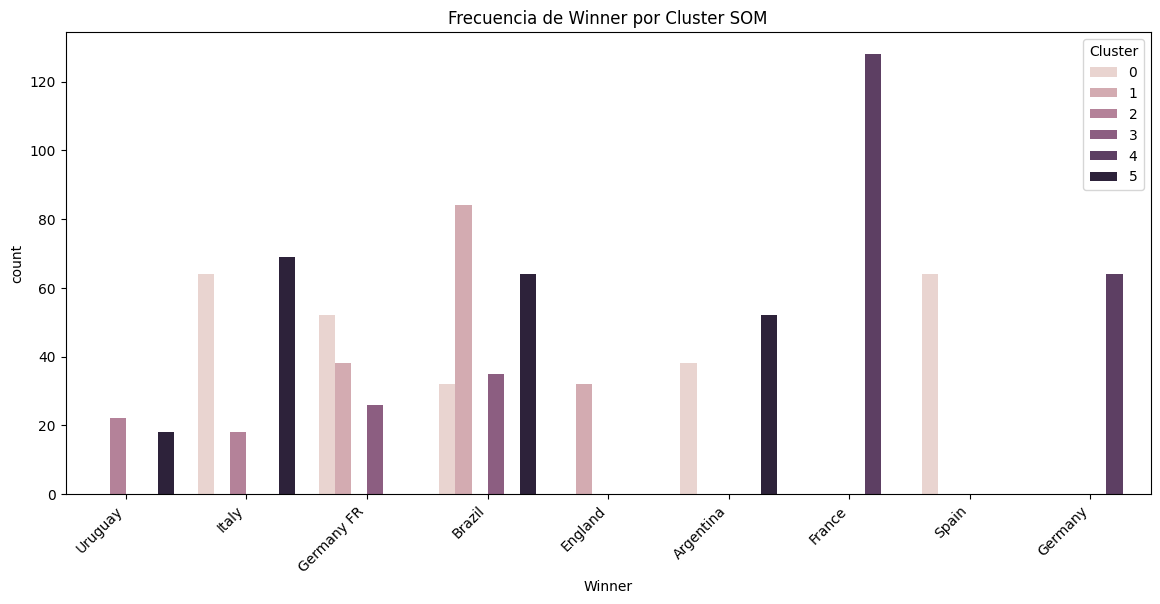

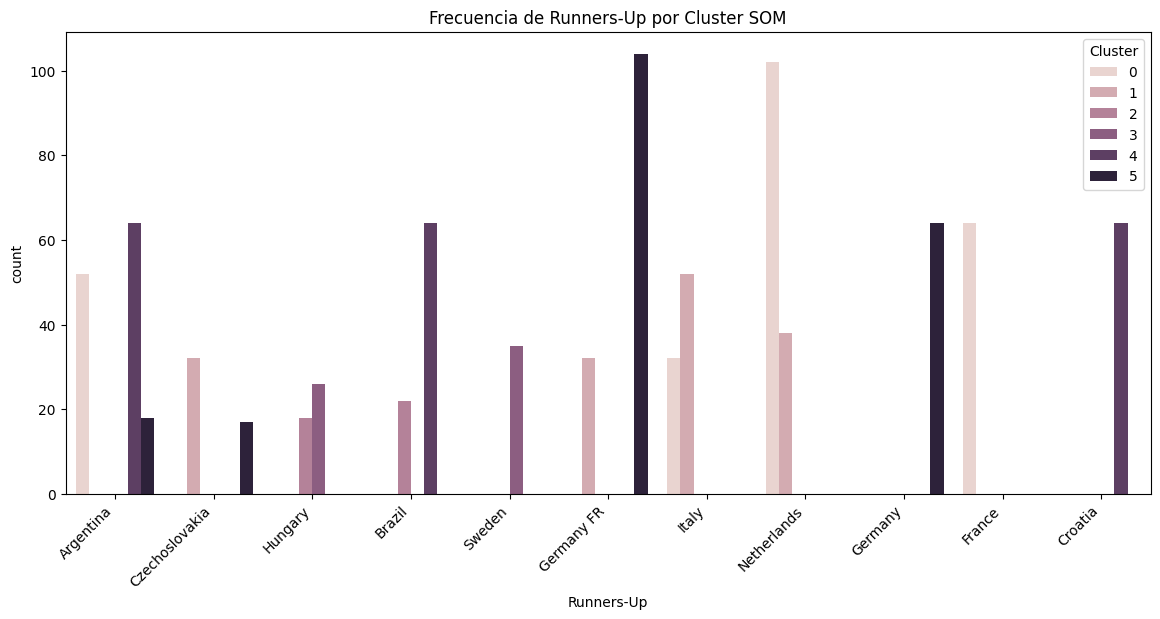

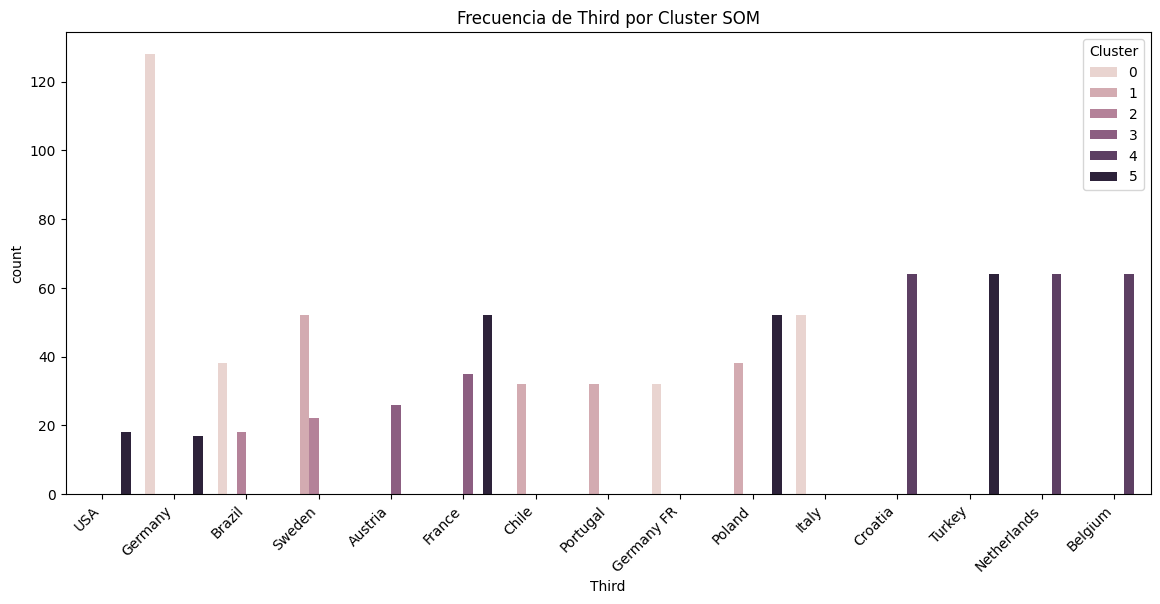

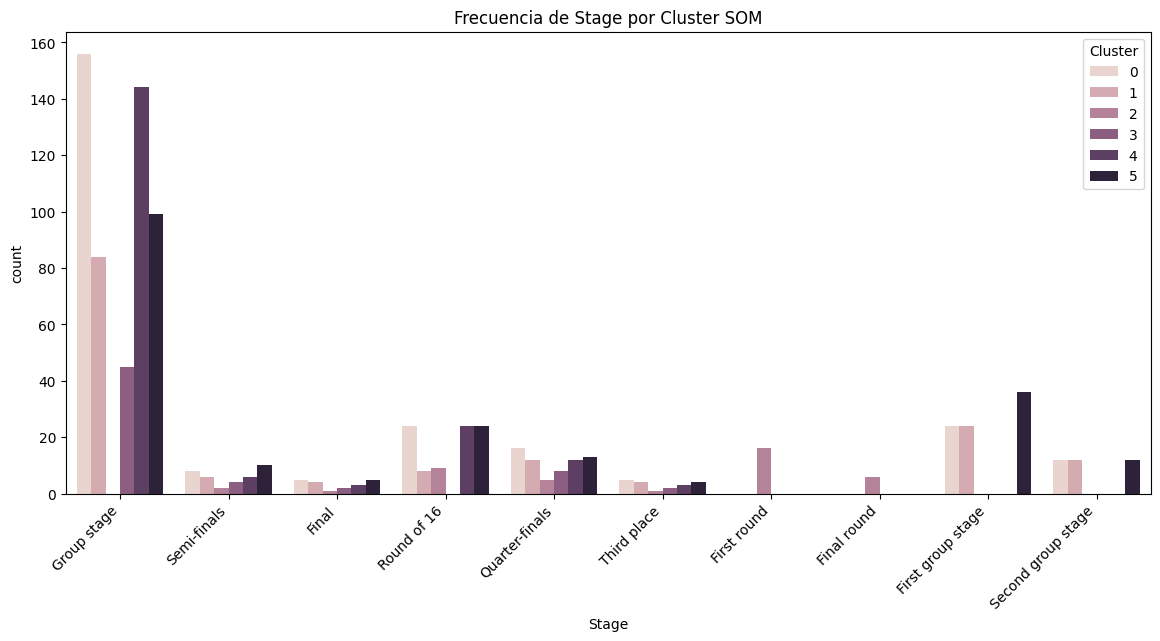

In [247]:
# Lista de columnas categóricas
categorical_columns = ['Winner', 'Runners-Up', 'Third', 'Stage']

# Gráfico de barras para Categorías por Cluster
for col in categorical_columns:
    plt.figure(figsize=(14, 6))
    sns.countplot(x=col, hue='Cluster', data=df_understandable)
    plt.title(f'Frecuencia de {col} por Cluster SOM')
    plt.xticks(rotation=45, ha='right')
    plt.show()


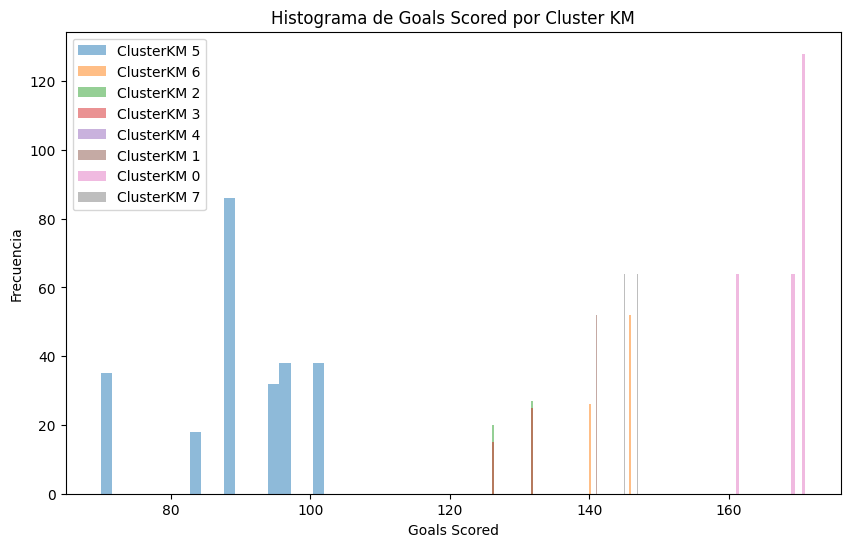

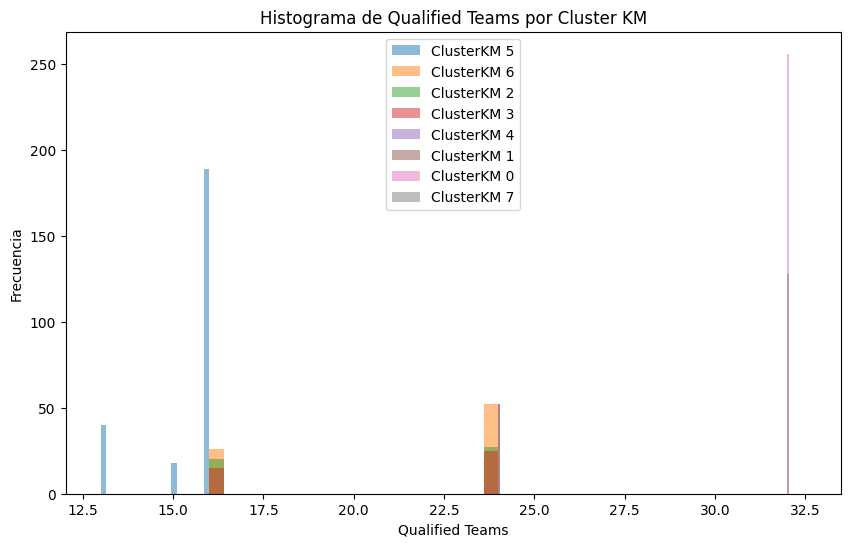

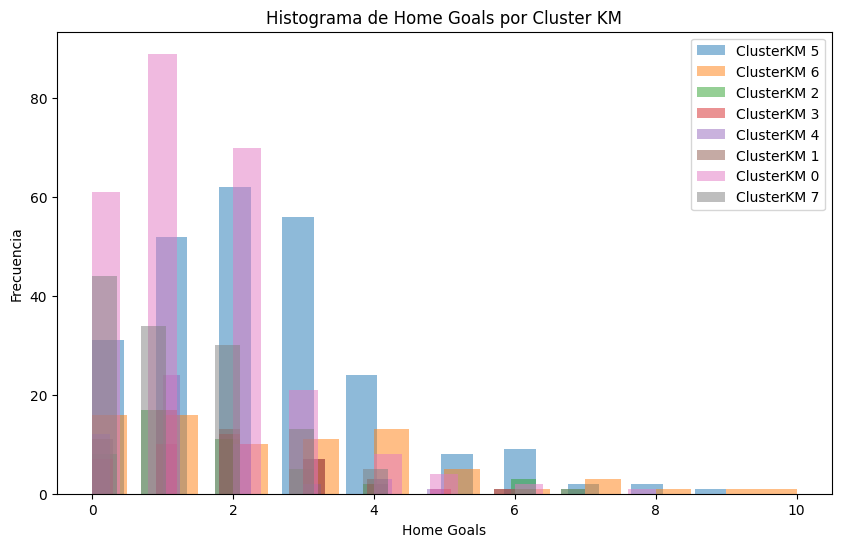

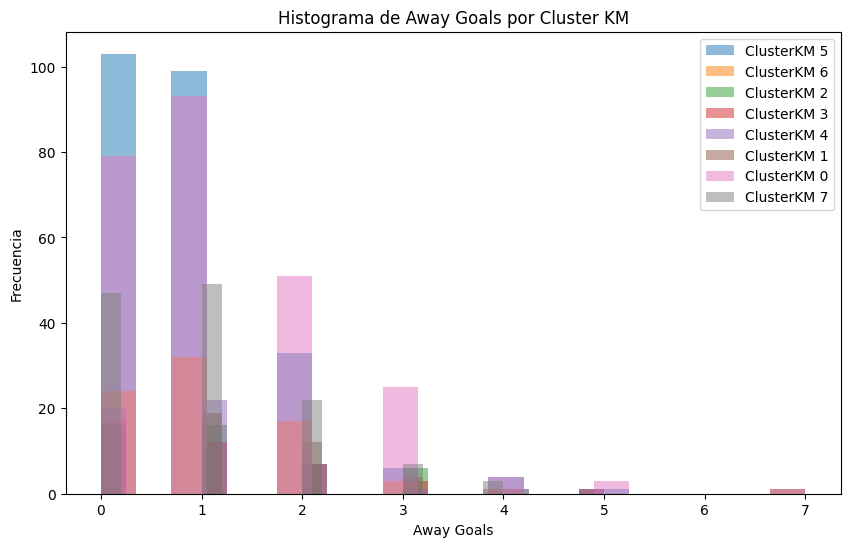

In [248]:
# Lista de columnas numéricas
numeric_columns = ['Goals Scored', 'Qualified Teams', 'Home Goals', 'Away Goals']

# Histogramas para Variables Numéricas por Cluster
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    for cluster in df_understandable['ClusterKM'].unique():
        subset = df_understandable[df_understandable['ClusterKM'] == cluster][col]
        plt.hist(subset, bins=20, alpha=0.5, label=f'ClusterKM {cluster}')

    plt.title(f'Histograma de {col} por Cluster KM')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()


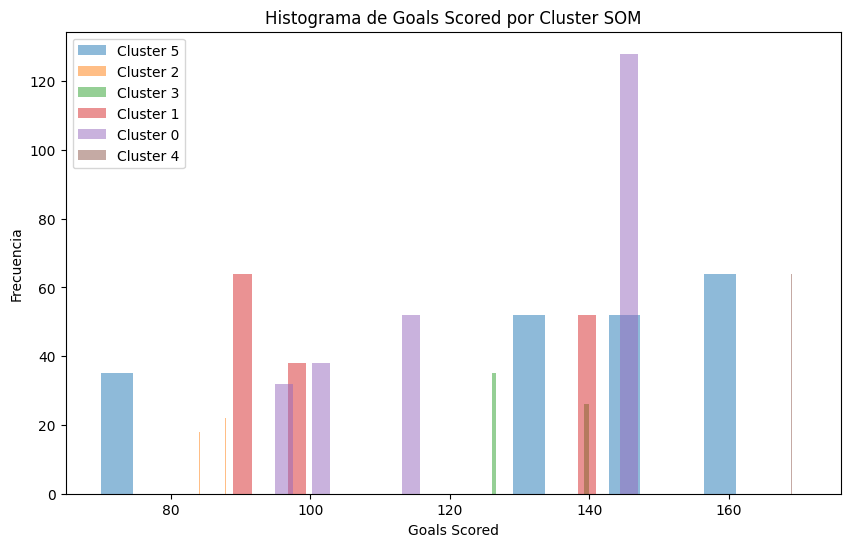

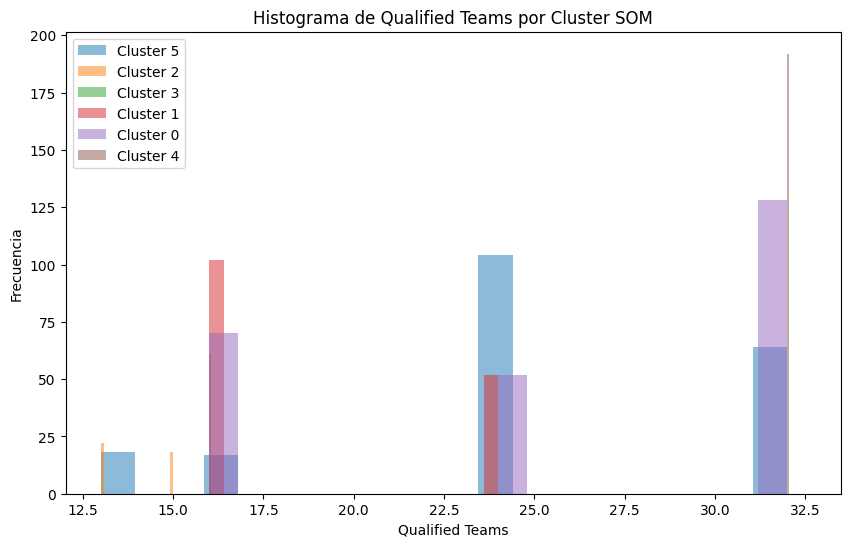

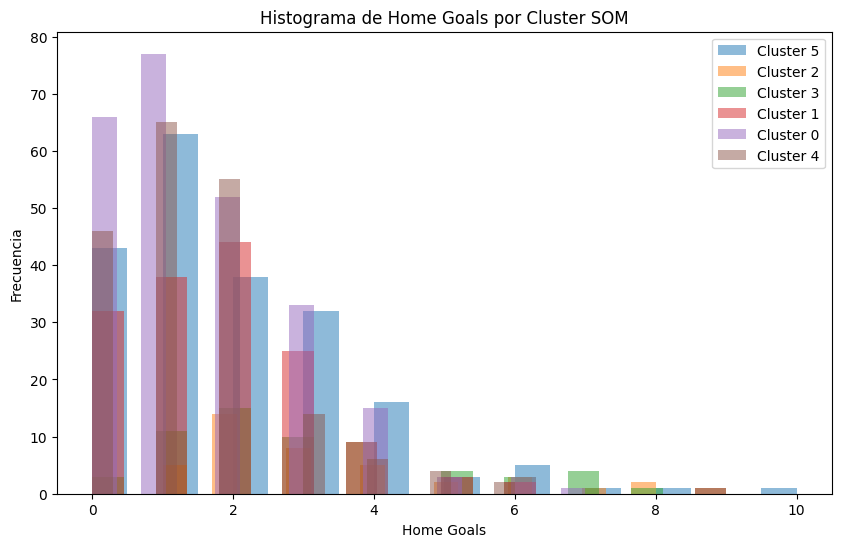

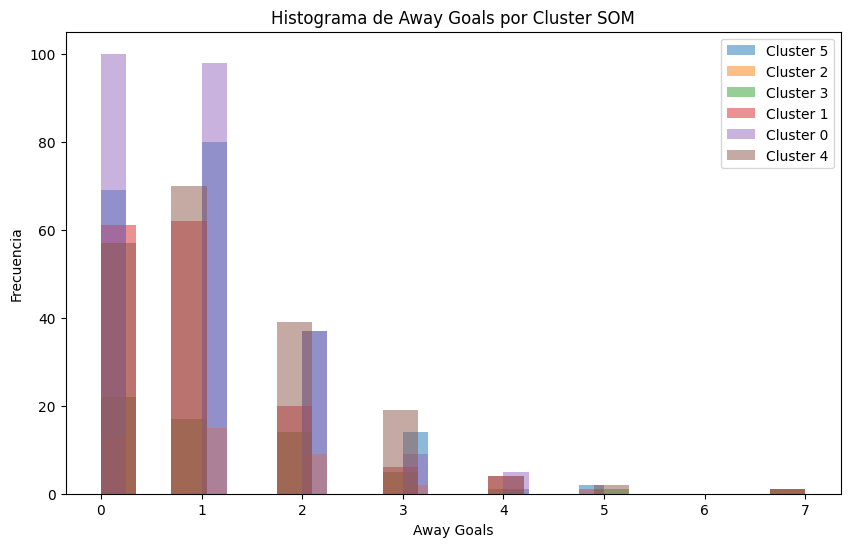

In [249]:
# Lista de columnas numéricas
numeric_columns = ['Goals Scored', 'Qualified Teams', 'Home Goals', 'Away Goals']

# Histogramas para Variables Numéricas por Cluster
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    for cluster in df_understandable['Cluster'].unique():
        subset = df_understandable[df_understandable['Cluster'] == cluster][col]
        plt.hist(subset, bins=20, alpha=0.5, label=f'Cluster {cluster}')

    plt.title(f'Histograma de {col} por Cluster SOM')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

## Conclusiones
- El problema empezó con el objetivo de clasificar quien sería el próximo ganador, sin embargo, por la misma naturaleza de la pregunta hay muchos datos por ser clasificados. 
- Al cruzar las tablas, a pesar de que se consiguió más información se ensuciaron muchos los datos ya que debido al numero de partidos en mundiales, algunos paises quedan más predominantes en el dataframe que otros, lo cual pudo haber sesgado la agrupación.
- Al estar agrupando datos que ya venian agrupados, se ve que se repite este patrón, por lo que en muchas ocasiones los datos lo separa según los mundiales e ignora otros datos.
- Una mejor aproximación a resolver la pregunta problema con clasificación sería que dados los grupos formados en la fase de grupos se vaya clasificando uno a uno los resultados de los partidos simulando el torneo para así intentar clasificar quien ganaría en la final. No intentar llegar a la final directamente puesto que no habrían datos previos. 
- Como problema de clasificación tiene ciertos inconvenientes al intentar predecir los resultados puesto que los datos también conllevan cierta aleatoriedad como: Equipos seleccionados en fase de grupos, jugadores actuales en la selección, lesiones, entre otros.
- Por la forma en que cruzamos los datos se cometió el error de proporcionar información redundante que afectó a la forma en que se agruparon los clusters y no deja a simple vista la organización de los clusters.